# Breast Cancer Detection: EDA and Preprocessing




## Phase 1: Data Loading

### 1.1 Import Required Libraries


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print(f"🎲 Random state set to: {RANDOM_STATE}")


✅ All libraries imported successfully!
📦 Pandas version: 2.2.3
📦 NumPy version: 2.1.3
🎲 Random state set to: 42


### 1.2 Load Dataset


In [2]:
# Load the dataset
data = pd.read_csv('data.csv')

# Drop unnamed columns (often an index column from CSV export)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

print("=" * 60)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\n📊 Dataset Shape: {data.shape}")
print(f"   - Rows (samples): {data.shape[0]:,}")
print(f"   - Columns: {data.shape[1]}")
print(f"\n📋 Column Names ({len(data.columns)}):")
print(data.columns.tolist())

DATASET LOADED SUCCESSFULLY

📊 Dataset Shape: (569, 32)
   - Rows (samples): 569
   - Columns: 32

📋 Column Names (32):
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### 1.3 Initial Data Inspection


In [3]:
# Display first few rows
print("=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
data.head()


FIRST 5 ROWS


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Dataset information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
data.info()


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

In [5]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) == 0:
    print("✅ No missing values found! Dataset is clean.")
else:
    print("⚠️ Missing values detected:")
    print(missing_df)


MISSING VALUES CHECK
✅ No missing values found! Dataset is clean.


In [6]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS CHECK")
print("=" * 60)
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates == 0:
    print("✅ No duplicate rows found!")
else:
    print(f"⚠️ Found {duplicates} duplicate rows")


DUPLICATE ROWS CHECK
Duplicate rows: 0
✅ No duplicate rows found!


In [7]:
# Target variable distribution
print("=" * 60)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 60)
target_counts = data['diagnosis'].value_counts()
target_percent = data['diagnosis'].value_counts(normalize=True) * 100

target_dist = pd.DataFrame({
    'Diagnosis': target_counts.index,
    'Count': target_counts.values,
    'Percentage': target_percent.values
})

print(target_dist.to_string(index=False))
print(f"\n📊 Class Imbalance Ratio: {target_counts['B'] / target_counts['M']:.2f}:1 (Benign:Malignant)")

# Store for later use
BENIGN_COUNT = target_counts['B']
MALIGNANT_COUNT = target_counts['M']
TOTAL_SAMPLES = len(data)


TARGET VARIABLE DISTRIBUTION
Diagnosis  Count  Percentage
        B    357   62.741652
        M    212   37.258348

📊 Class Imbalance Ratio: 1.68:1 (Benign:Malignant)


In [8]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
data.describe()


STATISTICAL SUMMARY


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


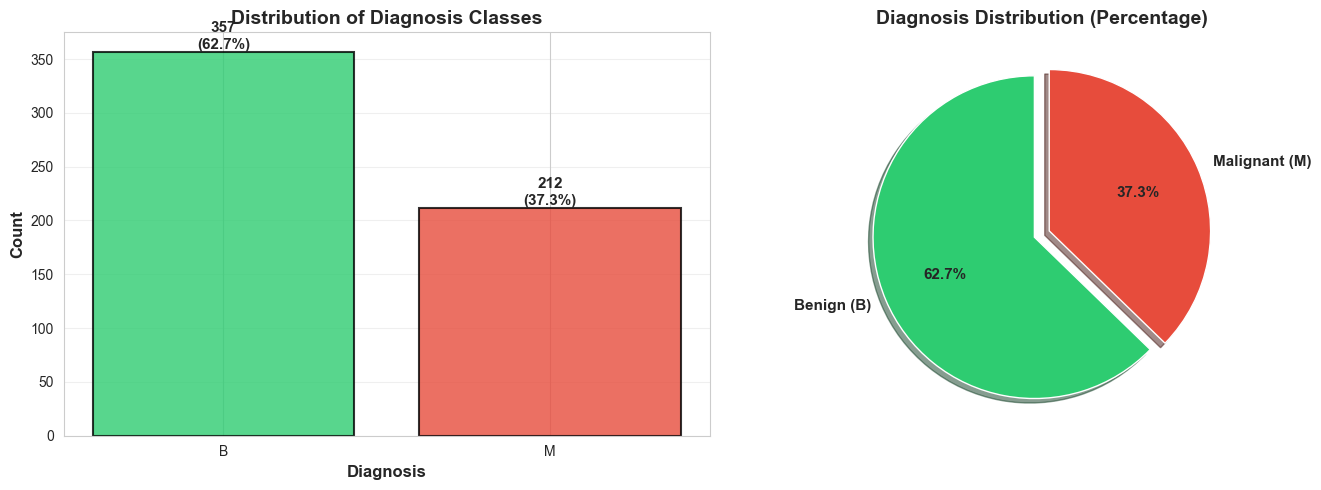


📌 Key Insights:
   • Benign cases: 357 (62.7%)
   • Malignant cases: 212 (37.3%)
   • Imbalance ratio: 1.68:1
   • ⚠️ Moderate class imbalance - will use STRATIFIED splitting


In [9]:
# Target variable visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
ax1 = axes[0]
counts = data['diagnosis'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for Benign, Red for Malignant
bars = ax1.bar(counts.index, counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Diagnosis', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Diagnosis Classes', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(data)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
ax2 = axes[1]
labels = ['Benign (B)', 'Malignant (M)']
sizes = [BENIGN_COUNT, MALIGNANT_COUNT]
explode = (0.05, 0.05)  # Slight separation
colors_pie = ['#2ecc71', '#e74c3c']

wedges, texts, autotexts = ax2.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                    autopct='%1.1f%%', shadow=True, startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Diagnosis Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📌 Key Insights:")
print(f"   • Benign cases: {BENIGN_COUNT} ({BENIGN_COUNT/TOTAL_SAMPLES*100:.1f}%)")
print(f"   • Malignant cases: {MALIGNANT_COUNT} ({MALIGNANT_COUNT/TOTAL_SAMPLES*100:.1f}%)")
print(f"   • Imbalance ratio: {BENIGN_COUNT/MALIGNANT_COUNT:.2f}:1")
print(f"   • ⚠️ Moderate class imbalance - will use STRATIFIED splitting")


### 2.2 Feature Distribution Analysis

#### 2.2.1 Distribution by Feature Type (Mean, SE, Worst)


In [10]:
# Separate features by type
mean_features = [col for col in data.columns if '_mean' in col]
se_features = [col for col in data.columns if '_se' in col]
worst_features = [col for col in data.columns if '_worst' in col]

print(f"📊 Feature Groups:")
print(f"   • Mean features: {len(mean_features)}")
print(f"   • SE features: {len(se_features)}")
print(f"   • Worst features: {len(worst_features)}")
print(f"\n✅ Total: {len(mean_features) + len(se_features) + len(worst_features)} features")


📊 Feature Groups:
   • Mean features: 10
   • SE features: 10
   • Worst features: 10

✅ Total: 30 features


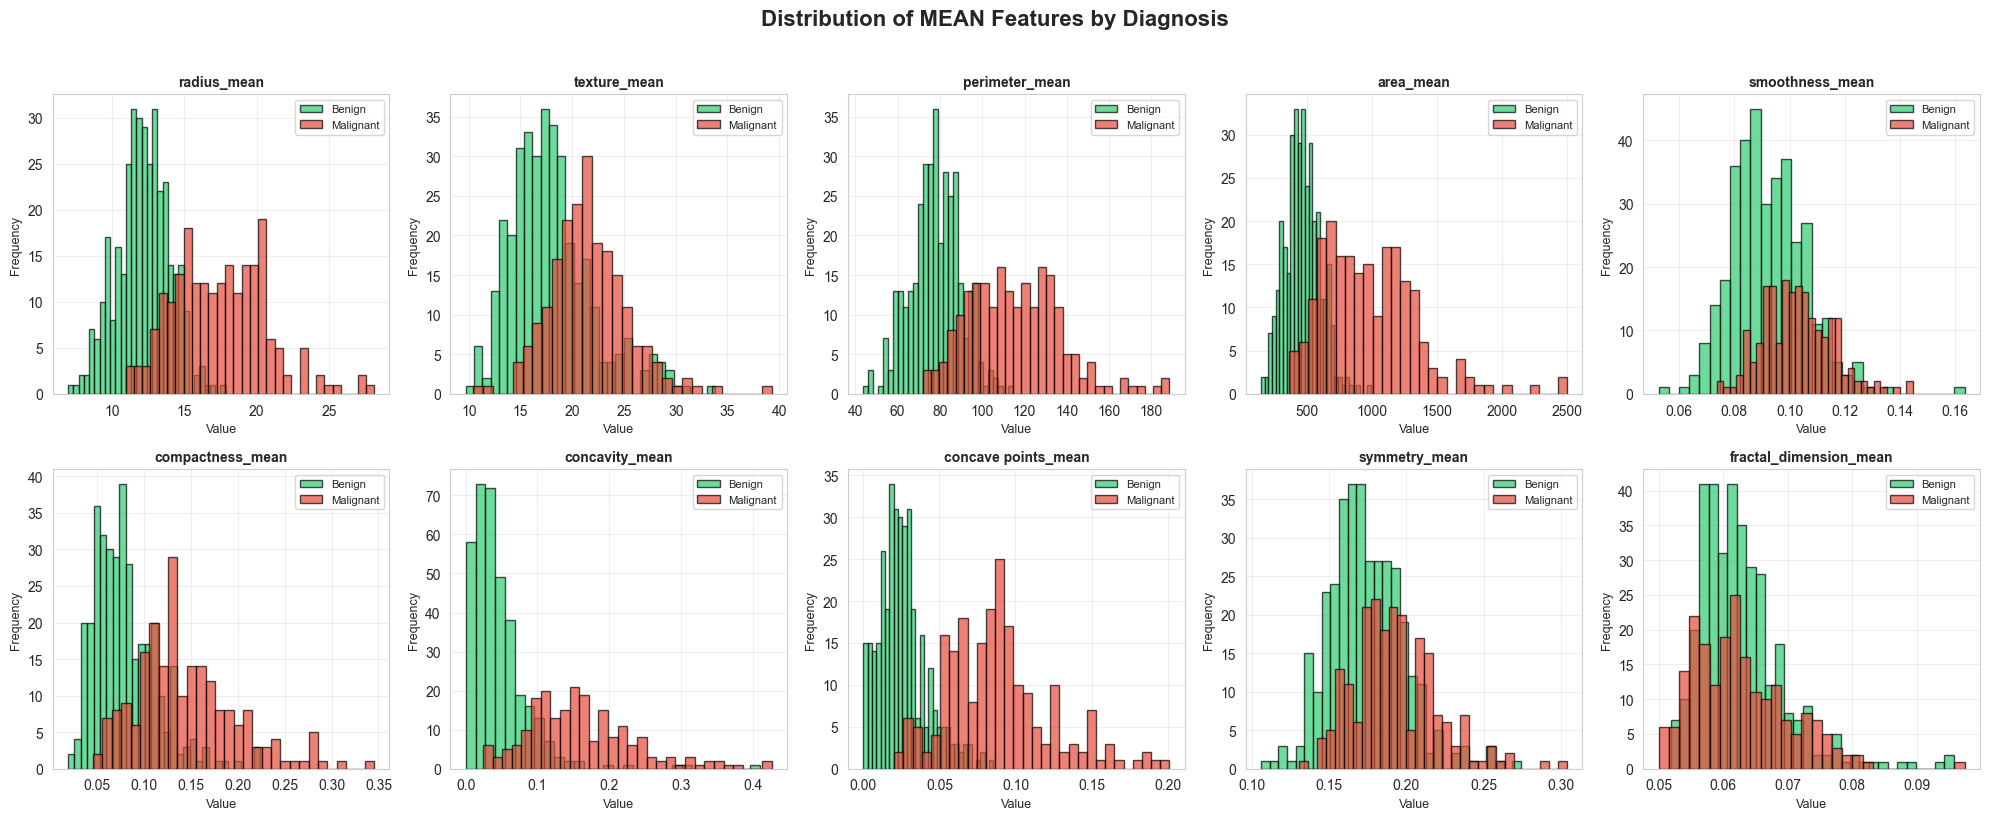

✅ MEAN features visualization complete


In [11]:
# Plot distributions for MEAN features, colored by diagnosis
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, feature in enumerate(mean_features):
    ax = axes[idx]
    
    # Separate by diagnosis
    benign_data = data[data['diagnosis'] == 'B'][feature]
    malignant_data = data[data['diagnosis'] == 'M'][feature]
    
    # Plot histograms
    ax.hist(benign_data, bins=30, alpha=0.7, label='Benign', color='#2ecc71', edgecolor='black')
    ax.hist(malignant_data, bins=30, alpha=0.7, label='Malignant', color='#e74c3c', edgecolor='black')
    
    ax.set_title(f'{feature}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Value', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.suptitle('Distribution of MEAN Features by Diagnosis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ MEAN features visualization complete")


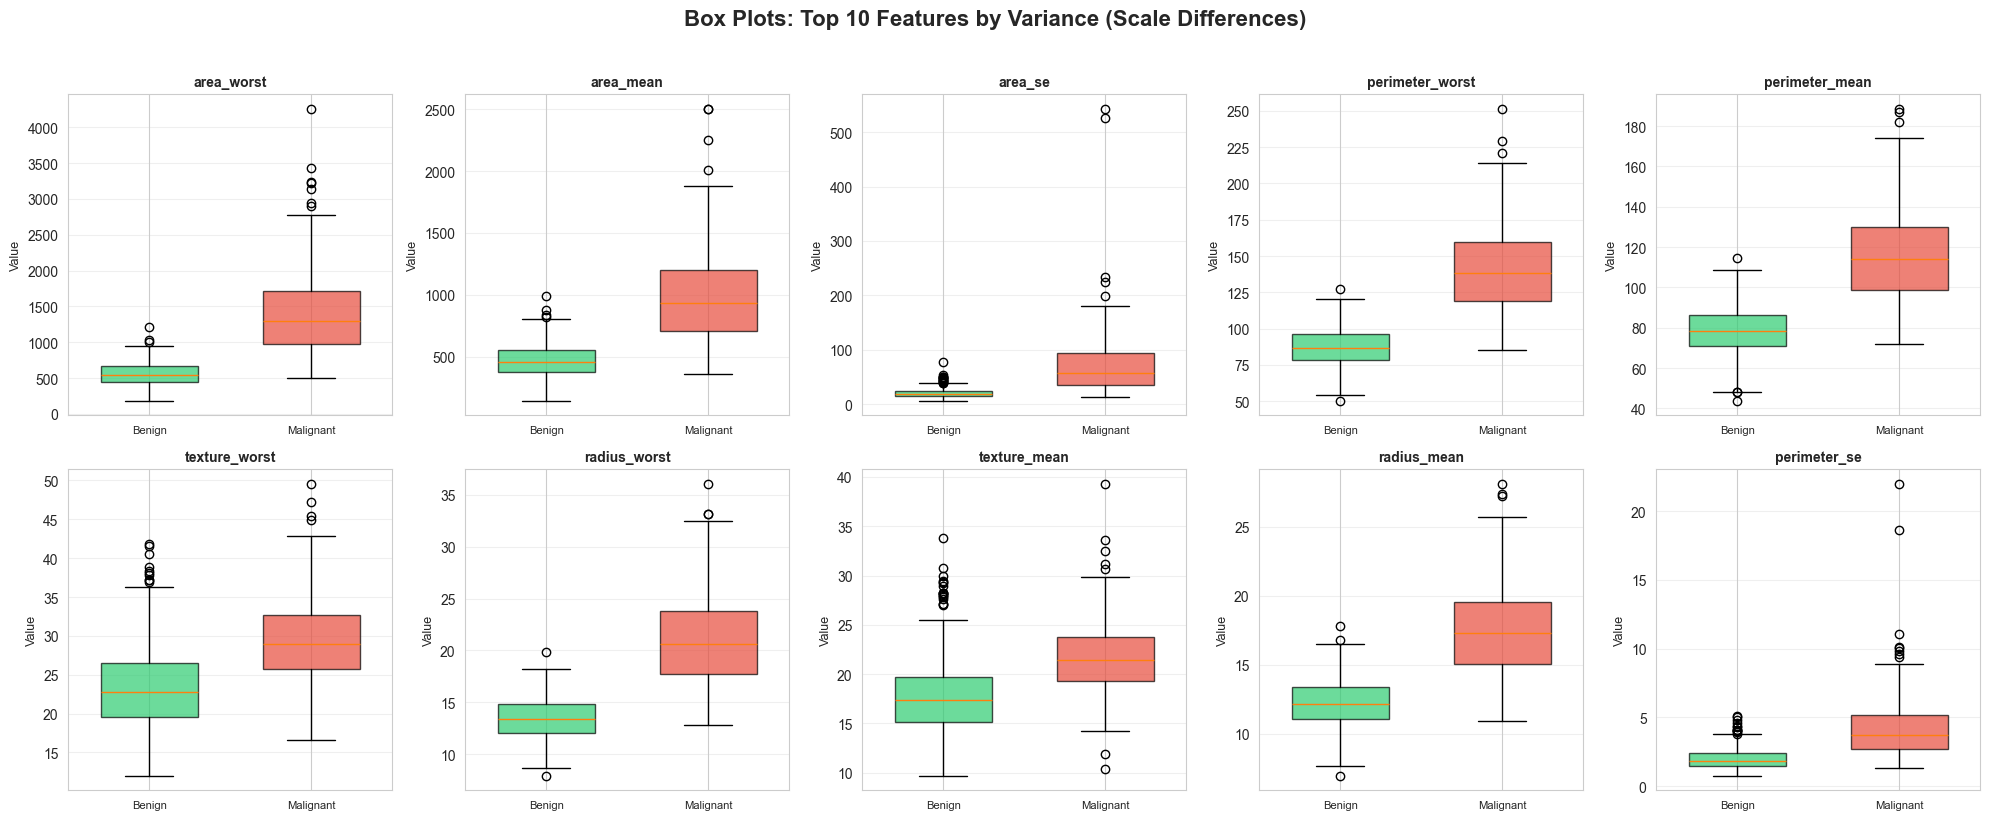

✅ Box plots showing scale differences - confirms need for standardization


In [12]:
# Box plots for top 10 features by variance (showing scale differences)
feature_variance = data.drop(['id', 'diagnosis'], axis=1).var().sort_values(ascending=False)
top_10_features = feature_variance.head(10).index.tolist()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, feature in enumerate(top_10_features):
    ax = axes[idx]
    
    # Create box plot data
    plot_data = [data[data['diagnosis'] == 'B'][feature].values,
                 data[data['diagnosis'] == 'M'][feature].values]
    
    bp = ax.boxplot(plot_data, labels=['Benign', 'Malignant'], 
                    patch_artist=True, widths=0.6)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_alpha(0.7)
    
    ax.set_title(f'{feature}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Value', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    plt.setp(ax.get_xticklabels(), fontsize=8)

plt.suptitle('Box Plots: Top 10 Features by Variance (Scale Differences)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ Box plots showing scale differences - confirms need for standardization")


### 2.3 Correlation Analysis


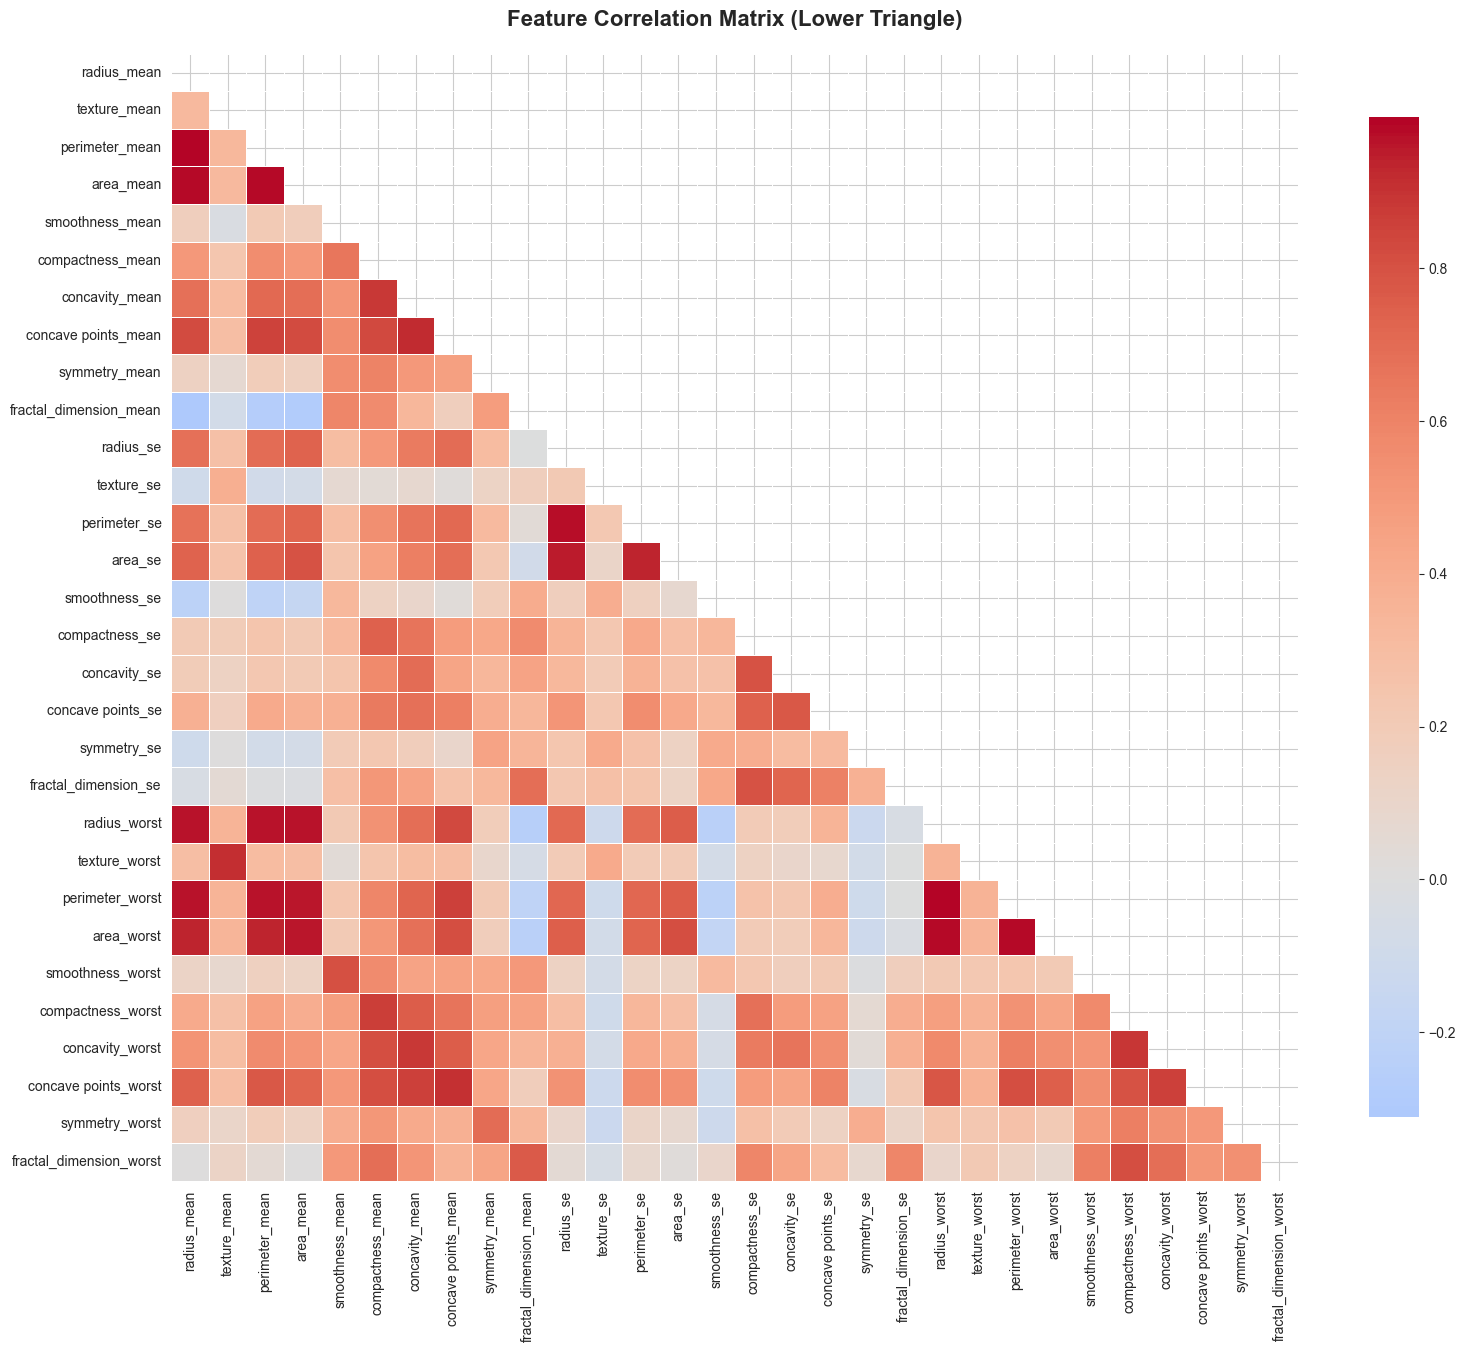

✅ Correlation heatmap created
📌 Look for highly correlated features (|r| > 0.9) - potential multicollinearity


In [13]:
# Calculate correlation matrix for all features
feature_cols = [col for col in data.columns if col not in ['id', 'diagnosis']]
correlation_matrix = data[feature_cols].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')

plt.title('Feature Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap created")
print("📌 Look for highly correlated features (|r| > 0.9) - potential multicollinearity")


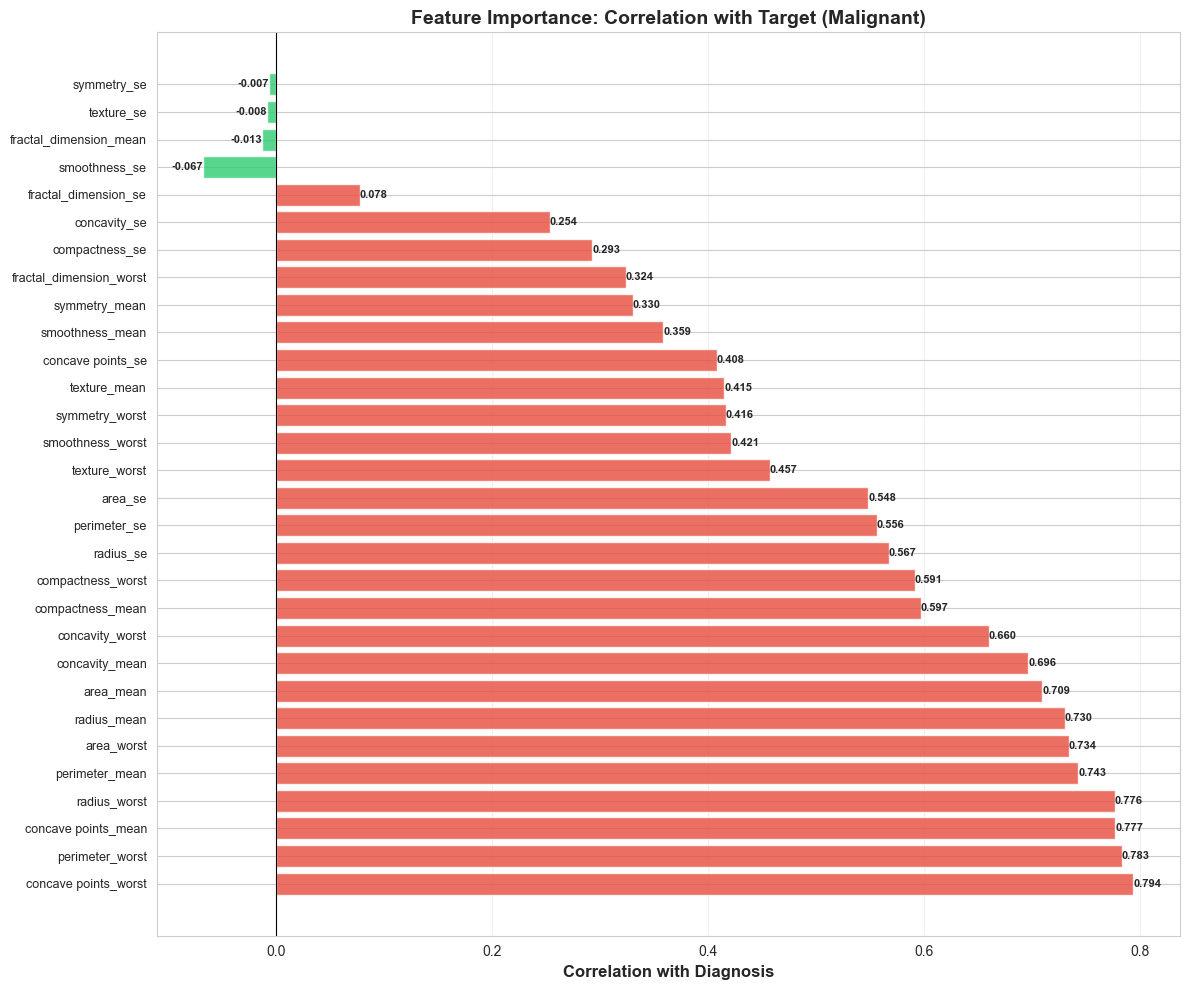

TOP 10 MOST IMPORTANT FEATURES (by absolute correlation)
 1. concave points_worst          : +0.7936
 2. perimeter_worst               : +0.7829
 3. concave points_mean           : +0.7766
 4. radius_worst                  : +0.7765
 5. perimeter_mean                : +0.7426
 6. area_worst                    : +0.7338
 7. radius_mean                   : +0.7300
 8. area_mean                     : +0.7090
 9. concavity_mean                : +0.6964
10. concavity_worst               : +0.6596


In [14]:
# Calculate correlation with target variable
data_encoded = data.copy()
data_encoded['diagnosis_encoded'] = data_encoded['diagnosis'].map({'B': 0, 'M': 1})

target_corr = data_encoded[feature_cols + ['diagnosis_encoded']].corr()['diagnosis_encoded'].drop('diagnosis_encoded')
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Plot feature importance by correlation
plt.figure(figsize=(12, 10))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in target_corr[target_corr_sorted.index]]
bars = plt.barh(range(len(target_corr_sorted)), target_corr[target_corr_sorted.index], color=colors, alpha=0.8)
plt.yticks(range(len(target_corr_sorted)), target_corr_sorted.index, fontsize=9)
plt.xlabel('Correlation with Diagnosis', fontsize=12, fontweight='bold')
plt.title('Feature Importance: Correlation with Target (Malignant)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, val) in enumerate(zip(target_corr_sorted.index, target_corr[target_corr_sorted.index])):
    plt.text(val, i, f'{val:.3f}', va='center', ha='left' if val > 0 else 'right', 
             fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print("=" * 60)
print("TOP 10 MOST IMPORTANT FEATURES (by absolute correlation)")
print("=" * 60)
top_10_features = target_corr_sorted.head(10)
for i, (feature, corr_val) in enumerate(zip(top_10_features.index, target_corr[top_10_features.index]), 1):
    print(f"{i:2d}. {feature:30s}: {corr_val:+.4f}")

# Store for later use
TOP_FEATURES = top_10_features.index.tolist()[:5]  # Top 5 for pair plots


### 2.4 Class Separability Analysis

#### 2.4.1 Pair Plots for Top Features


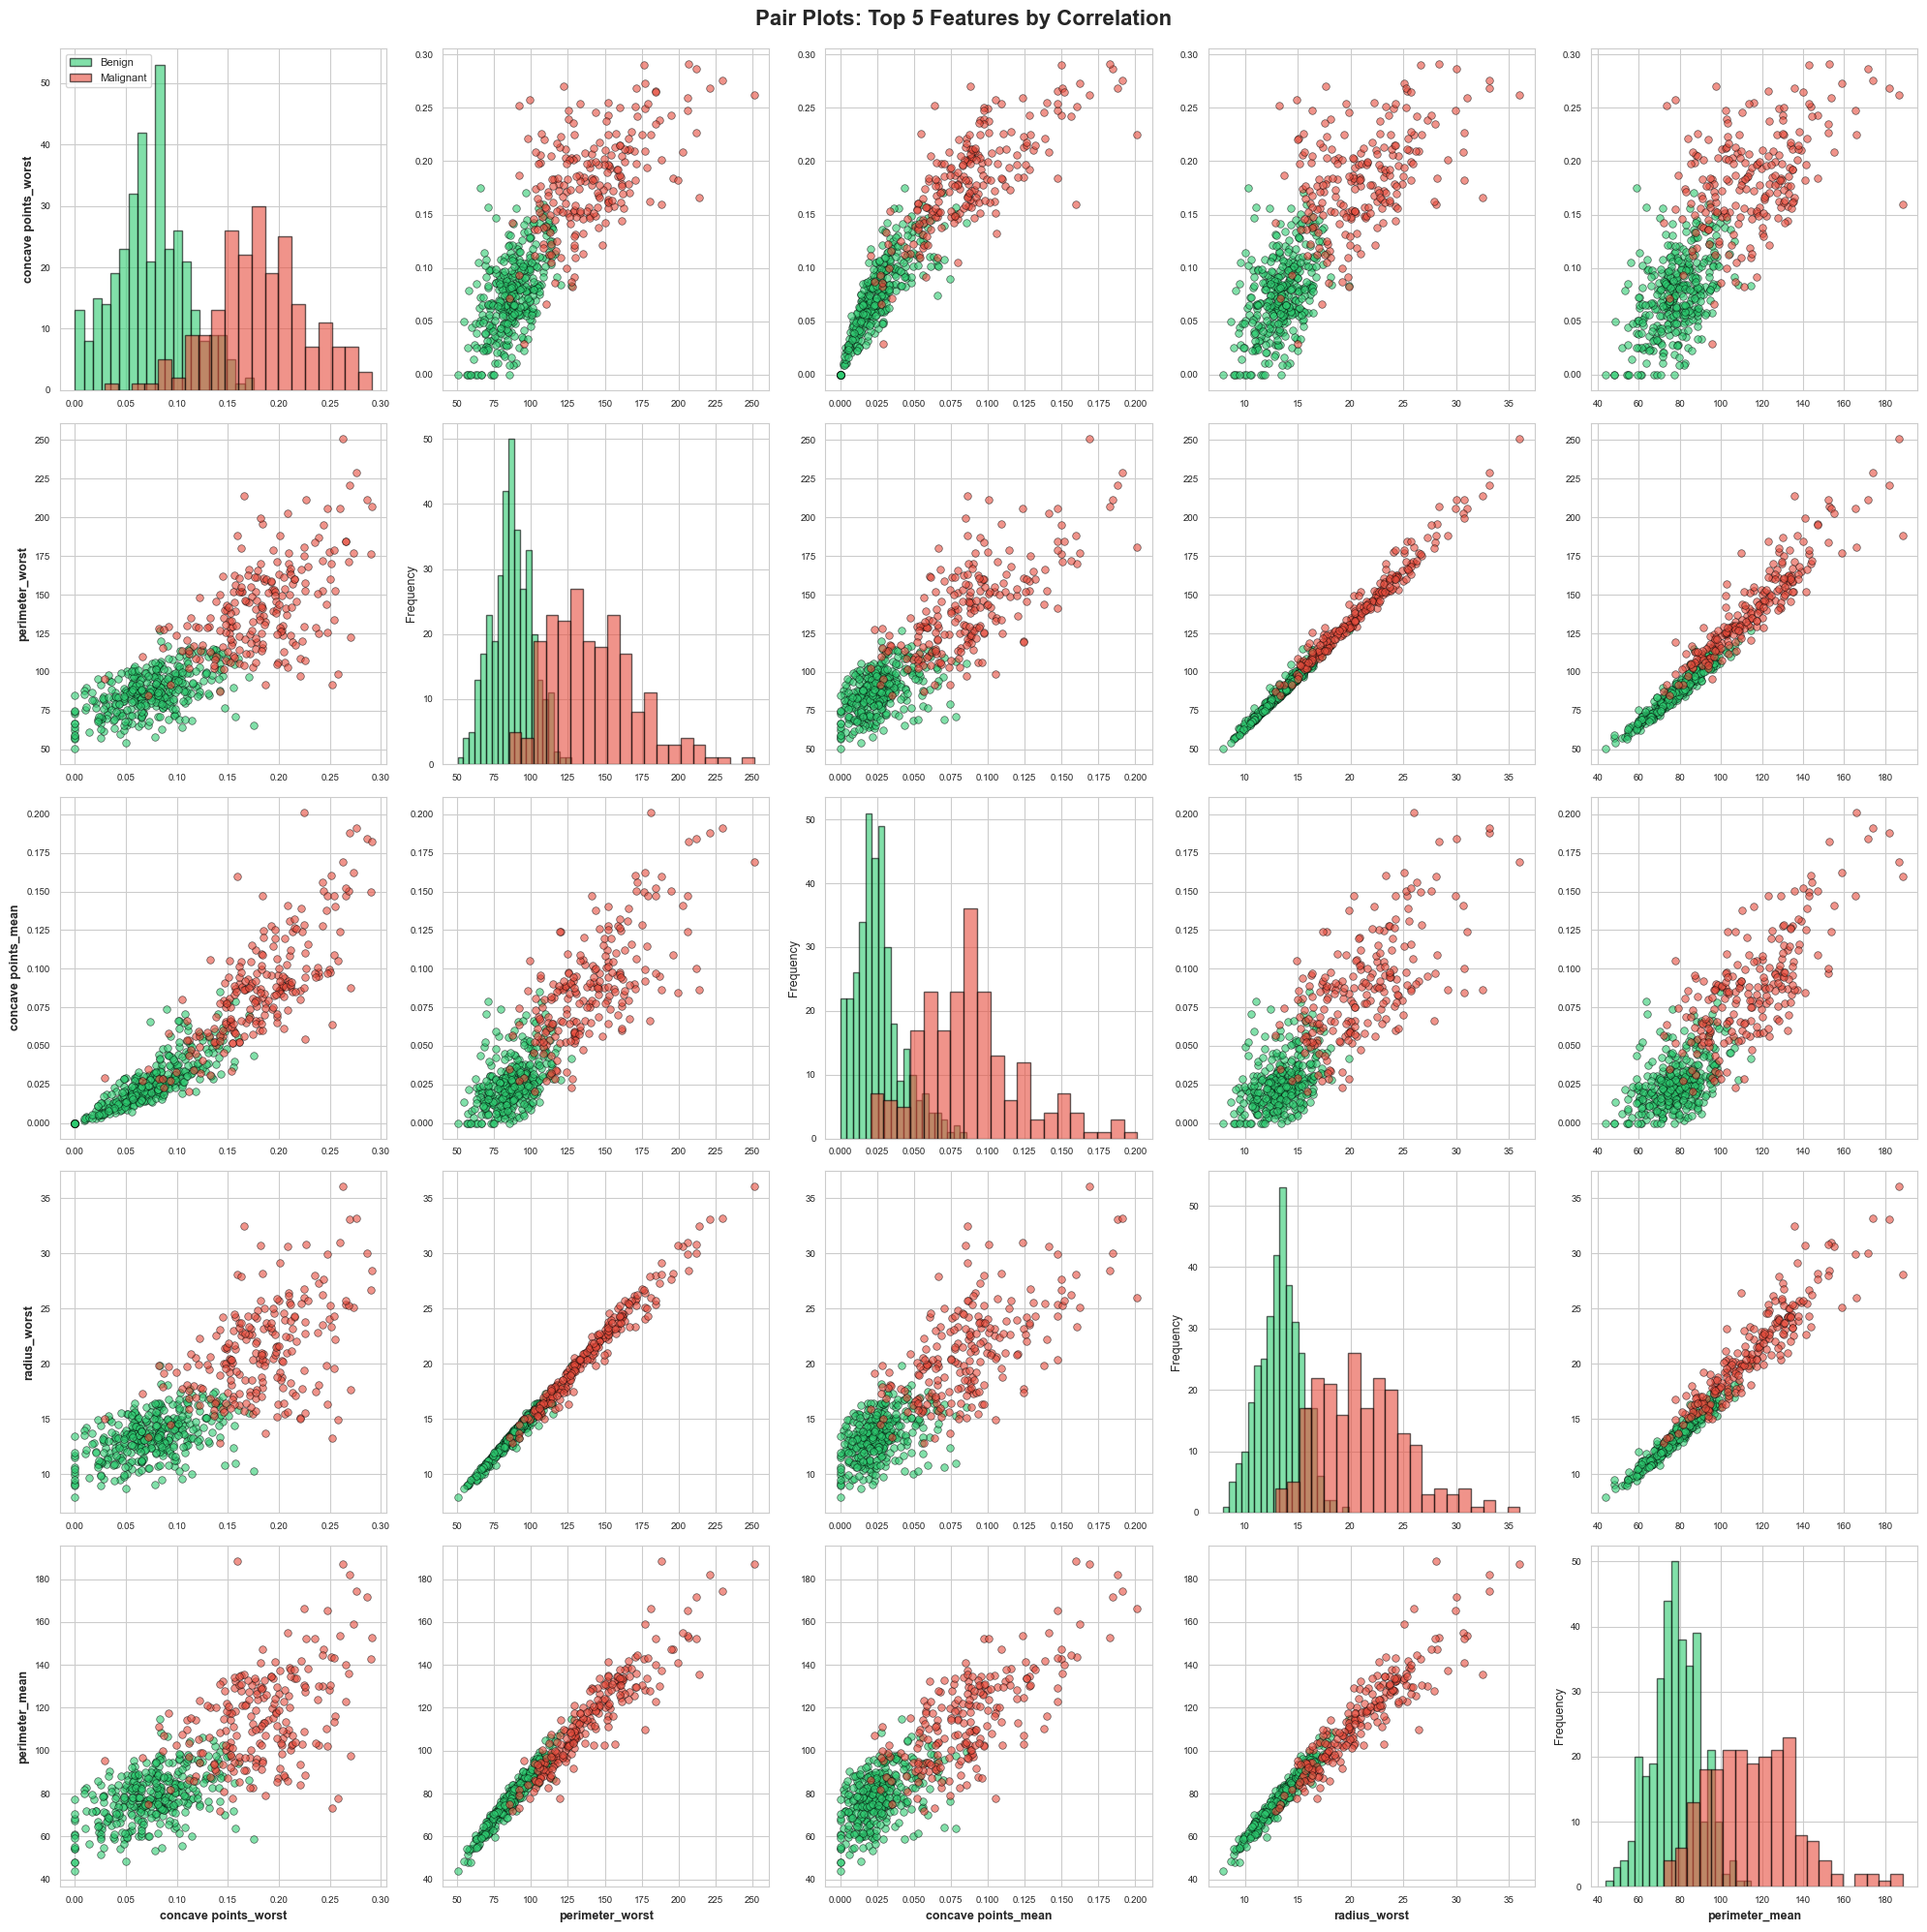

✅ Pair plots created - shows class separability


In [15]:
# Pair plot for top 5 features
top_5_features = TOP_FEATURES[:5]

fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i, feat1 in enumerate(top_5_features):
    for j, feat2 in enumerate(top_5_features):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: Histogram
            ax.hist(data[data['diagnosis']=='B'][feat1], bins=20, alpha=0.6, 
                   label='Benign', color='#2ecc71', edgecolor='black')
            ax.hist(data[data['diagnosis']=='M'][feat1], bins=20, alpha=0.6, 
                   label='Malignant', color='#e74c3c', edgecolor='black')
            ax.set_ylabel('Frequency', fontsize=9)
        else:
            # Off-diagonal: Scatter plot
            ax.scatter(data[data['diagnosis']=='B'][feat2], 
                      data[data['diagnosis']=='B'][feat1],
                      alpha=0.6, s=30, label='Benign', color='#2ecc71', edgecolors='black', linewidth=0.5)
            ax.scatter(data[data['diagnosis']=='M'][feat2], 
                      data[data['diagnosis']=='M'][feat1],
                      alpha=0.6, s=30, label='Malignant', color='#e74c3c', edgecolors='black', linewidth=0.5)
        
        if i == 4:
            ax.set_xlabel(feat2, fontsize=9, fontweight='bold')
        if j == 0:
            ax.set_ylabel(feat1, fontsize=9, fontweight='bold')
        
        ax.tick_params(labelsize=7)
        if i == 0 and j == 0:
            ax.legend(fontsize=8, loc='upper left')

plt.suptitle('Pair Plots: Top 5 Features by Correlation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Pair plots created - shows class separability")


#### 2.4.2 PCA Visualization (2D)


PCA PREPARATION - DATA QUALITY CHECK

✅ NaN values before standardization: 0
✅ Infinite values: 0
✅ NaN values after standardization: 0
✅ Data is clean for PCA - Shape: (569, 30)
   • Samples: 569
   • Features: 30


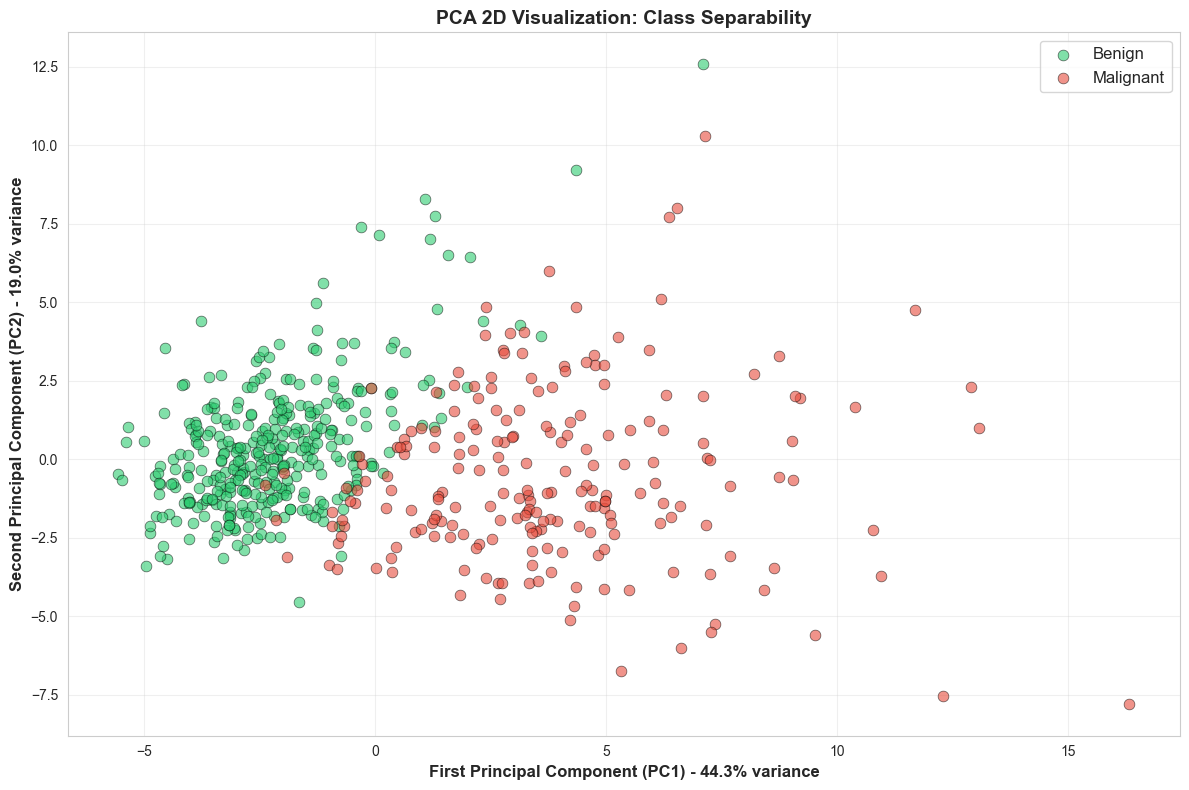

✅ PCA Visualization Complete
   • PC1 explains 44.27% of variance
   • PC2 explains 18.97% of variance
   • Total variance explained: 63.24%

📌 Insight: Classes show clear separation - linear models should work well!


In [16]:
# Prepare data for PCA (standardize first)
# Ensure feature_cols is defined (in case cell wasn't run in order)
if 'feature_cols' not in locals():
    feature_cols = [col for col in data.columns if col not in ['id', 'diagnosis']]

X_pca = data[feature_cols].copy()
y_pca = data['diagnosis'].values

# Check for NaN values before standardization
print("=" * 60)
print("PCA PREPARATION - DATA QUALITY CHECK")
print("=" * 60)
nan_before = X_pca.isnull().sum().sum()
print(f"\n✅ NaN values before standardization: {nan_before}")
if nan_before > 0:
    print("⚠️ Warning: NaN values detected! Checking which features...")
    nan_features = X_pca.isnull().sum()
    print(nan_features[nan_features > 0])
    # Fill NaN with mean (shouldn't happen with WDBC, but just in case)
    X_pca = X_pca.fillna(X_pca.mean())

# Check for infinite values
inf_count = np.isinf(X_pca.values).sum()
print(f"✅ Infinite values: {inf_count}")

# Convert to numpy array for standardization
X_pca_array = X_pca.values.astype(float)

# Standardize
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca_array)

# Check for NaN after standardization
nan_after = np.isnan(X_pca_scaled).sum()
print(f"✅ NaN values after standardization: {nan_after}")
if nan_after > 0:
    print("⚠️ Warning: NaN values after standardization!")
    print("   This may indicate constant features (std=0)")
    # Replace any NaN with 0 (for constant features that become 0/0)
    X_pca_scaled = np.nan_to_num(X_pca_scaled, nan=0.0)

# Verify data is clean before PCA
if np.isnan(X_pca_scaled).sum() > 0 or np.isinf(X_pca_scaled).sum() > 0:
    raise ValueError("Data still contains NaN or Inf values after cleaning!")

print(f"✅ Data is clean for PCA - Shape: {X_pca_scaled.shape}")
print(f"   • Samples: {X_pca_scaled.shape[0]}")
print(f"   • Features: {X_pca_scaled.shape[1]}")

# Apply PCA
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_2d = pca.fit_transform(X_pca_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y_pca

# Plot
plt.figure(figsize=(12, 8))
scatter1 = plt.scatter(pca_df[pca_df['diagnosis']=='B']['PC1'], 
                       pca_df[pca_df['diagnosis']=='B']['PC2'],
                       alpha=0.6, s=60, label='Benign', color='#2ecc71', 
                       edgecolors='black', linewidth=0.5)
scatter2 = plt.scatter(pca_df[pca_df['diagnosis']=='M']['PC1'], 
                       pca_df[pca_df['diagnosis']=='M']['PC2'],
                       alpha=0.6, s=60, label='Malignant', color='#e74c3c', 
                       edgecolors='black', linewidth=0.5)

plt.xlabel(f'First Principal Component (PC1) - {pca.explained_variance_ratio_[0]*100:.1f}% variance', 
           fontsize=12, fontweight='bold')
plt.ylabel(f'Second Principal Component (PC2) - {pca.explained_variance_ratio_[1]*100:.1f}% variance', 
           fontsize=12, fontweight='bold')
plt.title('PCA 2D Visualization: Class Separability', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ PCA Visualization Complete")
print(f"   • PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"   • PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"   • Total variance explained: {(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100:.2f}%")
print(f"\n📌 Insight: Classes show clear separation - linear models should work well!")


### 2.5 Statistical Summary by Class


In [17]:
# Compare statistics for Benign vs Malignant
print("=" * 60)
print("STATISTICAL COMPARISON: BENIGN vs MALIGNANT")
print("=" * 60)

# Select a few key features for comparison
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'concavity_mean', 'concave points_mean', 'radius_worst', 'area_worst']

comparison_stats = pd.DataFrame({
    'Feature': key_features,
    'Benign_Mean': [data[data['diagnosis']=='B'][f].mean() for f in key_features],
    'Malignant_Mean': [data[data['diagnosis']=='M'][f].mean() for f in key_features],
    'Difference': [data[data['diagnosis']=='M'][f].mean() - data[data['diagnosis']=='B'][f].mean() 
                   for f in key_features]
})

comparison_stats['Difference_Percent'] = (comparison_stats['Difference'] / comparison_stats['Benign_Mean']) * 100

print("\n📊 Key Feature Comparison:")
print(comparison_stats.to_string(index=False))

print("\n📌 Key Insights:")
print("   • Malignant tumors have consistently higher values across features")
print("   • This confirms clear class separability")
print("   • Feature differences are substantial, which is good for classification")


STATISTICAL COMPARISON: BENIGN vs MALIGNANT

📊 Key Feature Comparison:
            Feature  Benign_Mean  Malignant_Mean  Difference  Difference_Percent
        radius_mean    12.146524       17.462830    5.316306           43.768130
       texture_mean    17.914762       21.604906    3.690144           20.598341
     perimeter_mean    78.075406      115.365377   37.289971           47.761482
          area_mean   462.790196      978.376415  515.586219          111.408198
     concavity_mean     0.046058        0.160775    0.114717          249.072995
concave points_mean     0.025717        0.087990    0.062273          242.141814
       radius_worst    13.379801       21.134811    7.755010           57.960579
         area_worst   558.899440     1422.286321  863.386881          154.479826

📌 Key Insights:
   • Malignant tumors have consistently higher values across features
   • This confirms clear class separability
   • Feature differences are substantial, which is good for classific

### 2.6 Outlier Detection


In [18]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers)

# Check outliers for all features
outlier_counts = {}
for feature in feature_cols:
    outlier_counts[feature] = detect_outliers_iqr(data, feature)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)
print(f"\nFeatures with most outliers:")
print(outlier_df.head(10).to_string(index=False))

total_outliers = outlier_df['Outlier_Count'].sum()
print(f"\n📊 Total outlier instances detected: {total_outliers}")
print(f"📌 Decision: Keep outliers (may represent legitimate medical cases)")
print(f"   Medical data outliers can be real and meaningful")


OUTLIER DETECTION (IQR Method)

Features with most outliers:
                Feature  Outlier_Count
                area_se             65
              radius_se             38
           perimeter_se             38
             area_worst             35
          smoothness_se             30
   fractal_dimension_se             28
         compactness_se             28
            symmetry_se             27
              area_mean             25
fractal_dimension_worst             24

📊 Total outlier instances detected: 608
📌 Decision: Keep outliers (may represent legitimate medical cases)
   Medical data outliers can be real and meaningful


## Phase 3: Preprocessing

### 3.1 Feature and Label Separation

**CRITICAL**: Remove ID column (non-predictive, would cause overfitting)


In [19]:
# Separate features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Features: Drop ID and target
y = data['diagnosis']                         # Target: Extract diagnosis

print("=" * 60)
print("FEATURE AND LABEL SEPARATION")
print("=" * 60)
print(f"\n✅ Features (X):")
print(f"   • Shape: {X.shape}")
print(f"   • Columns: {len(X.columns)} features")
print(f"\n✅ Target (y):")
print(f"   • Shape: {y.shape}")
print(f"   • Unique values: {y.unique()}")
print(f"   • Value counts:")
print(y.value_counts())

# Verify no ID column remains
assert 'id' not in X.columns, "❌ ERROR: ID column still present in features!"
assert 'diagnosis' not in X.columns, "❌ ERROR: Diagnosis column still present in features!"
print("\n✅ Verification passed: ID and diagnosis columns properly removed")


FEATURE AND LABEL SEPARATION

✅ Features (X):
   • Shape: (569, 30)
   • Columns: 30 features

✅ Target (y):
   • Shape: (569,)
   • Unique values: ['M' 'B']
   • Value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

✅ Verification passed: ID and diagnosis columns properly removed


### 3.2 Label Encoding

Convert categorical labels to numerical:
- B (Benign) → 0
- M (Malignant) → 1


In [20]:
# Encode labels: B → 0, M → 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify encoding
print("=" * 60)
print("LABEL ENCODING")
print("=" * 60)
print(f"\nOriginal labels: {y.unique()}")
print(f"Encoded labels: {np.unique(y_encoded)}")
print(f"\nMapping:")
print(f"   • B (Benign) → {label_encoder.transform(['B'])[0]}")
print(f"   • M (Malignant) → {label_encoder.transform(['M'])[0]}")

# Verify distribution maintained
encoded_counts = pd.Series(y_encoded).value_counts()
print(f"\n✅ Encoded distribution:")
print(f"   • Class 0 (Benign): {encoded_counts[0]} samples")
print(f"   • Class 1 (Malignant): {encoded_counts[1]} samples")
print(f"\n✅ Label encoding complete")


LABEL ENCODING

Original labels: ['M' 'B']
Encoded labels: [0 1]

Mapping:
   • B (Benign) → 0
   • M (Malignant) → 1

✅ Encoded distribution:
   • Class 0 (Benign): 357 samples
   • Class 1 (Malignant): 212 samples

✅ Label encoding complete


### 3.3 Train-Test Split (STRATIFIED - Critical!)

**⚠️ CRITICAL**: Must use `stratify` to maintain class proportions in train/test sets!


In [21]:
# STRATIFIED train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.3,           # 30% for testing
    random_state=RANDOM_STATE,  # For reproducibility
    stratify=y_encoded       # CRITICAL: Maintain class proportions
)

print("=" * 60)
print("TRAIN-TEST SPLIT (STRATIFIED)")
print("=" * 60)
print(f"\n📊 Split Configuration:")
print(f"   • Test size: 30%")
print(f"   • Random state: {RANDOM_STATE}")
print(f"   • Stratified: YES ✅")

print(f"\n✅ Training Set:")
print(f"   • Shape: {X_train.shape}")
print(f"   • Samples: {len(X_train):,}")
print(f"   • Features: {X_train.shape[1]}")

print(f"\n✅ Test Set:")
print(f"   • Shape: {X_test.shape}")
print(f"   • Samples: {len(X_test):,}")
print(f"   • Features: {X_test.shape[1]}")

# Verify class distribution
train_benign = np.sum(y_train == 0)
train_malignant = np.sum(y_train == 1)
test_benign = np.sum(y_test == 0)
test_malignant = np.sum(y_test == 1)

print(f"\n📊 Class Distribution Verification:")
print(f"\n   Training Set:")
print(f"   • Benign (0): {train_benign} ({train_benign/len(y_train)*100:.1f}%)")
print(f"   • Malignant (1): {train_malignant} ({train_malignant/len(y_train)*100:.1f}%)")

print(f"\n   Test Set:")
print(f"   • Benign (0): {test_benign} ({test_benign/len(y_test)*100:.1f}%)")
print(f"   • Malignant (1): {test_malignant} ({test_malignant/len(y_test)*100:.1f}%)")

# Verify proportions are similar
train_benign_ratio = train_benign / len(y_train)
test_benign_ratio = test_benign / len(y_test)
original_benign_ratio = BENIGN_COUNT / TOTAL_SAMPLES

print(f"\n✅ Stratification Verification:")
print(f"   • Original Benign ratio: {original_benign_ratio:.3f}")
print(f"   • Train Benign ratio: {train_benign_ratio:.3f}")
print(f"   • Test Benign ratio: {test_benign_ratio:.3f}")
print(f"\n   ✅ Ratios match! Stratification successful!")


TRAIN-TEST SPLIT (STRATIFIED)

📊 Split Configuration:
   • Test size: 30%
   • Random state: 42
   • Stratified: YES ✅

✅ Training Set:
   • Shape: (398, 30)
   • Samples: 398
   • Features: 30

✅ Test Set:
   • Shape: (171, 30)
   • Samples: 171
   • Features: 30

📊 Class Distribution Verification:

   Training Set:
   • Benign (0): 250 (62.8%)
   • Malignant (1): 148 (37.2%)

   Test Set:
   • Benign (0): 107 (62.6%)
   • Malignant (1): 64 (37.4%)

✅ Stratification Verification:
   • Original Benign ratio: 0.627
   • Train Benign ratio: 0.628
   • Test Benign ratio: 0.626

   ✅ Ratios match! Stratification successful!


### 3.4 Feature Standardization





In [22]:
# CRITICAL: Fit scaler ONLY on training data
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using training statistics (no fit!)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (preserve column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("=" * 60)
print("FEATURE STANDARDIZATION")
print("=" * 60)
print(f"\n✅ Standardization Process:")
print(f"   • Fit scaler on: Training data ONLY ✅")
print(f"   • Transform: Both train and test")
print(f"   • Data leakage prevention: VERIFIED ✅")

print(f"\n📊 Verification - Training Set Statistics:")
print(f"   • Mean (should be ~0):")
print(f"     {X_train_scaled.mean().head().to_string()}")
print(f"\n   • Std (should be ~1):")
print(f"     {X_train_scaled.std().head().to_string()}")

# Detailed verification
train_mean_check = X_train_scaled.mean().abs().max()
train_std_check = (X_train_scaled.std() - 1).abs().max()

print(f"\n✅ Standardization Verification:")
print(f"   • Max absolute mean: {train_mean_check:.6f} (should be ~0)")
print(f"   • Max absolute std deviation from 1: {train_std_check:.6f} (should be ~0)")

if train_mean_check < 0.01 and train_std_check < 0.01:
    print(f"\n   ✅ Standardization successful!")
else:
    print(f"\n   ⚠️ Warning: Standardization may not be perfect")

print(f"\n📊 Final Data Shapes:")
print(f"   • X_train_scaled: {X_train_scaled.shape}")
print(f"   • X_test_scaled: {X_test_scaled.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • y_test: {y_test.shape}")


FEATURE STANDARDIZATION

✅ Standardization Process:
   • Fit scaler on: Training data ONLY ✅
   • Transform: Both train and test
   • Data leakage prevention: VERIFIED ✅

📊 Verification - Training Set Statistics:
   • Mean (should be ~0):
     radius_mean        4.463208e-17
texture_mean      -4.407418e-16
perimeter_mean     7.933352e-16
area_mean          5.355850e-17
smoothness_mean   -1.640229e-16

   • Std (should be ~1):
     radius_mean        1.001259
texture_mean       1.001259
perimeter_mean     1.001259
area_mean          1.001259
smoothness_mean    1.001259

✅ Standardization Verification:
   • Max absolute mean: 0.000000 (should be ~0)
   • Max absolute std deviation from 1: 0.001259 (should be ~0)

   ✅ Standardization successful!

📊 Final Data Shapes:
   • X_train_scaled: (398, 30)
   • X_test_scaled: (171, 30)
   • y_train: (398,)
   • y_test: (171,)


### 3.5 Final Data Verification

Complete verification checklist to ensure data is ready for modeling.


In [23]:
print("=" * 60)
print("FINAL DATA VERIFICATION CHECKLIST")
print("=" * 60)

checklist = []

# 1. Check shapes
shape_ok = (X_train_scaled.shape[0] + X_test_scaled.shape[0] == TOTAL_SAMPLES and
            X_train_scaled.shape[1] == 30 and X_test_scaled.shape[1] == 30)
checklist.append(("Data shapes correct", shape_ok))
print(f"\n1. Data shapes: {'✅ PASS' if shape_ok else '❌ FAIL'}")

# 2. Check no missing values
no_missing_train = X_train_scaled.isnull().sum().sum() == 0
no_missing_test = X_test_scaled.isnull().sum().sum() == 0
no_missing = no_missing_train and no_missing_test
checklist.append(("No missing values", no_missing))
print(f"2. No missing values: {'✅ PASS' if no_missing else '❌ FAIL'}")

# 3. Check all features are numerical
all_numeric = (X_train_scaled.dtypes == 'float64').all() and (X_test_scaled.dtypes == 'float64').all()
checklist.append(("All features numerical", all_numeric))
print(f"3. All features numerical: {'✅ PASS' if all_numeric else '❌ FAIL'}")

# 4. Check class proportions maintained
train_prop_ok = abs((train_benign/len(y_train)) - (BENIGN_COUNT/TOTAL_SAMPLES)) < 0.02
test_prop_ok = abs((test_benign/len(y_test)) - (BENIGN_COUNT/TOTAL_SAMPLES)) < 0.02
proportions_ok = train_prop_ok and test_prop_ok
checklist.append(("Class proportions maintained", proportions_ok))
print(f"4. Class proportions maintained: {'✅ PASS' if proportions_ok else '❌ FAIL'}")

# 5. Check standardization
standardization_ok = train_mean_check < 0.01 and train_std_check < 0.01
checklist.append(("Standardization successful", standardization_ok))
print(f"5. Standardization successful: {'✅ PASS' if standardization_ok else '❌ FAIL'}")

# 6. Check no data leakage (scaler fitted on train only)
# This is a conceptual check - we verified by fitting only on train
no_leakage = True  # Manual verification based on code
checklist.append(("Data leakage prevented", no_leakage))
print(f"6. Data leakage prevented: {'✅ PASS' if no_leakage else '❌ FAIL'}")

# Summary
all_passed = all([check[1] for check in checklist])
print(f"\n{'='*60}")
print(f"{'✅ ALL CHECKS PASSED!' if all_passed else '❌ SOME CHECKS FAILED!'}")
print(f"{'='*60}")

if all_passed:
    print(f"\n🎉 Data preprocessing complete! Ready for model training!")
    print(f"\n📦 Preprocessed data summary:")
    print(f"   • Training samples: {len(X_train_scaled):,}")
    print(f"   • Test samples: {len(X_test_scaled):,}")
    print(f"   • Features: {X_train_scaled.shape[1]}")
    print(f"   • All features standardized (mean=0, std=1)")
    print(f"   • Stratified split maintains class balance")
else:
    print(f"\n⚠️ Please review failed checks before proceeding")


FINAL DATA VERIFICATION CHECKLIST

1. Data shapes: ✅ PASS
2. No missing values: ✅ PASS
3. All features numerical: ✅ PASS
4. Class proportions maintained: ✅ PASS
5. Standardization successful: ✅ PASS
6. Data leakage prevented: ✅ PASS

✅ ALL CHECKS PASSED!

🎉 Data preprocessing complete! Ready for model training!

📦 Preprocessed data summary:
   • Training samples: 398
   • Test samples: 171
   • Features: 30
   • All features standardized (mean=0, std=1)
   • Stratified split maintains class balance


## Phase 4: Summary & Documentation

### Key Findings and Decisions

#### Dataset Summary


In [24]:
print("=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET SUMMARY:")
print(f"   • Total samples: {TOTAL_SAMPLES:,}")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • Benign cases: {BENIGN_COUNT} ({BENIGN_COUNT/TOTAL_SAMPLES*100:.1f}%)")
print(f"   • Malignant cases: {MALIGNANT_COUNT} ({MALIGNANT_COUNT/TOTAL_SAMPLES*100:.1f}%)")
print(f"   • Class imbalance ratio: {BENIGN_COUNT/MALIGNANT_COUNT:.2f}:1")

print(f"\n🔍 EDA KEY FINDINGS:")
print(f"   • ✅ No missing values detected")
print(f"   • ✅ No duplicate rows")
print(f"   • ✅ Features show large scale differences → Standardization required")
print(f"   • ✅ Classes are linearly separable (confirmed by PCA visualization)")
print(f"   • ✅ Top features by correlation: {', '.join(TOP_FEATURES[:3])}")
print(f"   • ✅ Outliers detected but kept (may represent legitimate medical cases)")

print(f"\n🔧 PREPROCESSING DECISIONS:")
print(f"   • Label encoding: B→0, M→1")
print(f"   • Train-test split: 70/30 with STRATIFICATION")
print(f"   • Standardization: StandardScaler (fitted on train only)")
print(f"   • Data leakage prevention: ✅ VERIFIED")

print(f"\n✅ FINAL DATA STATUS:")
print(f"   • Training set: {X_train_scaled.shape[0]:,} samples × {X_train_scaled.shape[1]} features")
print(f"   • Test set: {X_test_scaled.shape[0]:,} samples × {X_test_scaled.shape[1]} features")
print(f"   • All features standardized (mean≈0, std≈1)")
print(f"   • Class proportions maintained in train/test splits")

print(f"\n🚀 READY FOR NEXT PHASE:")
print(f"   • Model training (Logistic Regression, SVM, Random Forest, MLP)")
print(f"   • Cross-validation implementation")
print(f"   • Model evaluation (metrics: accuracy, sensitivity, specificity, ROC-AUC)")
print(f"   • Model comparison and selection")

print(f"\n{'='*60}")
print("✅ PREPROCESSING COMPLETE - DATA READY FOR MODELING!")
print(f"{'='*60}")


PROJECT SUMMARY

📊 DATASET SUMMARY:
   • Total samples: 569
   • Total features: 30
   • Benign cases: 357 (62.7%)
   • Malignant cases: 212 (37.3%)
   • Class imbalance ratio: 1.68:1

🔍 EDA KEY FINDINGS:
   • ✅ No missing values detected
   • ✅ No duplicate rows
   • ✅ Features show large scale differences → Standardization required
   • ✅ Classes are linearly separable (confirmed by PCA visualization)
   • ✅ Top features by correlation: concave points_worst, perimeter_worst, concave points_mean
   • ✅ Outliers detected but kept (may represent legitimate medical cases)

🔧 PREPROCESSING DECISIONS:
   • Label encoding: B→0, M→1
   • Train-test split: 70/30 with STRATIFICATION
   • Standardization: StandardScaler (fitted on train only)
   • Data leakage prevention: ✅ VERIFIED

✅ FINAL DATA STATUS:
   • Training set: 398 samples × 30 features
   • Test set: 171 samples × 30 features
   • All features standardized (mean≈0, std≈1)
   • Class proportions maintained in train/test splits

🚀 RE

## Phase 5: Model Training and Evaluation with GridSearchCV Hyperparameter Tuning

### Overview
This section implements multiple machine learning models for breast cancer detection **with optimized hyperparameters from the start using GridSearchCV**:
1. **Logistic Regression** - Baseline linear model
2. **Support Vector Machine (SVM)** - Optimal hyperplane classifier
3. **Random Forest** - Ensemble tree-based model
4. **Multi-Layer Perceptron (MLP)** - Neural network
5. **XGBoost** - Gradient boosting ensemble



### 5.1 Import Machine Learning Libraries


In [25]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, GridSearchCV

# Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, precision_recall_curve,
                            make_scorer)

# XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠️ XGBoost not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'xgboost', '-q'])
    import xgboost as xgb
    XGBOOST_AVAILABLE = True

# Time tracking
import time

print("✅ All ML libraries imported successfully!")
print(f"✅ XGBoost available: {XGBOOST_AVAILABLE}")

✅ All ML libraries imported successfully!
✅ XGBoost available: True


### 5.2 Define Evaluation Metrics Functions

**Clinical Priority**: Sensitivity (True Positive Rate for Malignant class) is CRITICAL


In [26]:
def evaluate_model(y_true, y_pred, y_proba=None):
    """
    Comprehensive model evaluation with clinical focus on Sensitivity.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    y_proba : array-like, optional
        Predicted probabilities for positive class (for ROC-AUC)
    
    Returns:
    --------
    dict : Dictionary containing all evaluation metrics
    """
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Confusion matrix components
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Clinical metrics (focus on Sensitivity!)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # Recall for Malignant (MOST IMPORTANT)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0  # Recall for Benign
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    
    # Additional metrics
    f1 = f1_score(y_true, y_pred)
    
    # ROC-AUC (requires probabilities)
    roc_auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    
    results = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,  # TPR for Malignant (CRITICAL!)
        'specificity': specificity,   # TNR for Benign
        'precision': precision,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN
    }
    
    return results

def print_evaluation(results, model_name="Model"):
    """Print evaluation results in a formatted way."""
    print("=" * 60)
    print(f"{model_name.upper()} - EVALUATION RESULTS")
    print("=" * 60)
    
    # Prominently display TP, TN, FP, FN first
    print(f"\n📋 CONFUSION MATRIX BREAKDOWN (Most Important):")
    print(f"   • True Positives (TP):  {results['TP']:3d} - Correctly identified cancers ✅")
    print(f"   • True Negatives (TN):  {results['TN']:3d} - Correctly identified benign cases ✅")
    print(f"   • False Positives (FP): {results['FP']:3d} - Benign flagged as cancer (unnecessary anxiety)")
    print(f"   • False Negatives (FN): {results['FN']:3d} - Cancers missed ⚠️ MOST DANGEROUS")
    
    print(f"\n📊 Classification Metrics:")
    print(f"   • Accuracy:      {results['accuracy']*100:.2f}%")
    print(f"   • Sensitivity:   {results['sensitivity']*100:.2f}% ⚠️ (MOST CRITICAL)")
    print(f"   • Specificity:   {results['specificity']*100:.2f}%")
    print(f"   • Precision:     {results['precision']*100:.2f}%")
    print(f"   • F1-Score:      {results['f1_score']*100:.2f}%")
    if results['roc_auc'] is not None:
        print(f"   • ROC-AUC:       {results['roc_auc']:.4f}")
    
    print(f"\n📋 Confusion Matrix (Table Format):")
    print(f"                 Predicted")
    print(f"                Benign  Malignant")
    print(f"Actual Benign      {results['TN']:3d}      {results['FP']:3d}")
    print(f"       Malignant   {results['FN']:3d}      {results['TP']:3d}")
    
    # Clinical assessment with warnings for pathological behavior
    print(f"\n⚠️  Clinical Assessment:")
    if results['sensitivity'] >= 0.98:
        print(f"   ✅ EXCELLENT Sensitivity ({results['sensitivity']*100:.2f}%) - Catches almost all cancers")
    elif results['sensitivity'] >= 0.95:
        print(f"   ✅ GOOD Sensitivity ({results['sensitivity']*100:.2f}%) - Meets clinical threshold")
    else:
        print(f"   ❌ POOR Sensitivity ({results['sensitivity']*100:.2f}%) - MISSING CANCERS - NOT ACCEPTABLE")
    
    # Warning for pathological models
    if results['specificity'] < 0.5 or results['accuracy'] < 0.7:
        print(f"\n⚠️  WARNING: Model shows pathological behavior!")
        print(f"   • Specificity: {results['specificity']*100:.1f}% (very low)")
        print(f"   • Accuracy: {results['accuracy']*100:.1f}% (very low)")
        print(f"   • This model may be predicting everything as one class")
        print(f"   • NOT suitable for clinical deployment")
    
    print("=" * 60)

print("✅ Evaluation functions defined successfully!")


✅ Evaluation functions defined successfully!


### 5.3 Setup Cross-Validation

**Stratified K-Fold**: Maintains class proportions in each fold (critical for imbalanced data)


In [27]:
# Setup Stratified K-Fold Cross-Validation
K_FOLDS = 5
cv = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

# Scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'sensitivity': 'recall',  # Recall = Sensitivity for binary classification
    'specificity': make_scorer(recall_score, pos_label=0),  # Recall for negative class
    'precision': 'precision',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

print("=" * 60)
print("CROSS-VALIDATION SETUP")
print("=" * 60)
print(f"\n✅ Configuration:")
print(f"   • K-Folds: {K_FOLDS}")
print(f"   • Stratified: YES (maintains class balance)")
print(f"   • Random State: {RANDOM_STATE}")
print(f"   • Shuffle: YES")
print(f"\n✅ Metrics to evaluate:")
for metric in scoring.keys():
    print(f"   • {metric}")

print("\n✅ Cross-validation ready!")


CROSS-VALIDATION SETUP

✅ Configuration:
   • K-Folds: 5
   • Stratified: YES (maintains class balance)
   • Random State: 42
   • Shuffle: YES

✅ Metrics to evaluate:
   • accuracy
   • sensitivity
   • specificity
   • precision
   • f1
   • roc_auc

✅ Cross-validation ready!


### 5.4 Train and Evaluate Models

We'll train each model, perform cross-validation, and evaluate on the test set.


#### 5.4.1 Logistic Regression


In [28]:
print("=" * 80)
print("TRAINING: Logistic Regression with GridSearchCV")
print("=" * 80)

# Define parameter grid
lr_param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}],
    'max_iter': [1000, 2000]
}

# Create base model
lr_base = LogisticRegression(random_state=RANDOM_STATE)

# GridSearchCV - Using F1-score for balanced optimization (prioritizes sensitivity but considers precision)
# F1-score balances precision and recall, preventing pathological solutions
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")
print(f"   • Parameter combinations to test: {len(lr_param_grid['C']) * len(lr_param_grid['solver']) * len(lr_param_grid['class_weight']) * len(lr_param_grid['max_iter'])}")
print(f"   • Cross-validation folds: {cv.n_splits}")
print(f"   • Optimization metric: F1-Score (balanced precision/recall)")

grid = GridSearchCV(
    lr_base,
    lr_param_grid,
    cv=cv,
    scoring='f1',  # F1-score balances sensitivity and precision
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get best model
lr_model = grid.best_estimator_

# Print best parameters
print(f"\n✅ Training complete in {training_time:.2f} seconds")
print(f"\n📊 Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n📊 Best CV Sensitivity: {grid.best_score_*100:.2f}%")

# Make predictions
y_test_pred_lr = lr_model.predict(X_test_scaled)
y_test_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lr_results = evaluate_model(y_test, y_test_pred_lr, y_test_proba_lr)

# Store in models_dict
models_dict = {}
models_dict['Logistic Regression'] = {
    'model': lr_model,
    'results': lr_results,
    'training_time': training_time,
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_
}

# Print evaluation
print_evaluation(lr_results, "Logistic Regression")

TRAINING: Logistic Regression with GridSearchCV

🔍 Performing GridSearchCV (this may take a few minutes)...
   • Parameter combinations to test: 48
   • Cross-validation folds: 5
   • Optimization metric: F1-Score (balanced precision/recall)
Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Training complete in 7.73 seconds

📊 Best Parameters:
   • C: 0.1
   • class_weight: {0: 1, 1: 3}
   • max_iter: 1000
   • solver: liblinear

📊 Best CV Sensitivity: 96.04%
LOGISTIC REGRESSION - EVALUATION RESULTS

📋 CONFUSION MATRIX BREAKDOWN (Most Important):
   • True Positives (TP):   63 - Correctly identified cancers ✅
   • True Negatives (TN):  106 - Correctly identified benign cases ✅
   • False Positives (FP):   1 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):   1 - Cancers missed ⚠️ MOST DANGEROUS

📊 Classification Metrics:
   • Accuracy:      98.83%
   • Sensitivity:   98.44% ⚠️ (MOST CRITICAL)
   • Specificity:   99.07%
   • Precision:     98.44%

#### 5.4.2 Support Vector Machine (SVM)


In [29]:
print("=" * 80)
print("TRAINING: Support Vector Machine (SVM) with GridSearchCV")
print("=" * 80)

# Define parameter grid
svm_param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0],
    'kernel': ['rbf', 'linear', 'poly'],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}

# Create base model
svm_base = SVC(probability=True, random_state=RANDOM_STATE)

# GridSearchCV - Using F1-score for balanced optimization (prioritizes sensitivity but considers precision)
# F1-score balances precision and recall, preventing pathological solutions
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")
print(f"   • Parameter combinations to test: {len(svm_param_grid['C']) * len(svm_param_grid['gamma']) * len(svm_param_grid['kernel']) * len(svm_param_grid['class_weight'])}")
print(f"   • Cross-validation folds: {cv.n_splits}")
print(f"   • Optimization metric: F1-Score (balanced precision/recall)")

grid = GridSearchCV(
    svm_base,
    svm_param_grid,
    cv=cv,
    scoring='f1',  # F1-score balances sensitivity and precision
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get best model
svm_model = grid.best_estimator_

# Print best parameters
print(f"\n✅ Training complete in {training_time:.2f} seconds")
print(f"\n📊 Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n📊 Best CV Sensitivity: {grid.best_score_*100:.2f}%")

# Make predictions
y_test_pred_svm = svm_model.predict(X_test_scaled)
y_test_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
svm_results = evaluate_model(y_test, y_test_pred_svm, y_test_proba_svm)

# Store in models_dict
models_dict['SVM'] = {
    'model': svm_model,
    'results': svm_results,
    'training_time': training_time,
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_
}

# Print evaluation
print_evaluation(svm_results, "Support Vector Machine")

TRAINING: Support Vector Machine (SVM) with GridSearchCV

🔍 Performing GridSearchCV (this may take a few minutes)...
   • Parameter combinations to test: 144
   • Cross-validation folds: 5
   • Optimization metric: F1-Score (balanced precision/recall)
Fitting 5 folds for each of 144 candidates, totalling 720 fits

✅ Training complete in 5.27 seconds

📊 Best Parameters:
   • C: 100.0
   • class_weight: balanced
   • gamma: 0.001
   • kernel: rbf

📊 Best CV Sensitivity: 96.95%
SUPPORT VECTOR MACHINE - EVALUATION RESULTS

📋 CONFUSION MATRIX BREAKDOWN (Most Important):
   • True Positives (TP):   61 - Correctly identified cancers ✅
   • True Negatives (TN):  107 - Correctly identified benign cases ✅
   • False Positives (FP):   0 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):   3 - Cancers missed ⚠️ MOST DANGEROUS

📊 Classification Metrics:
   • Accuracy:      98.25%
   • Sensitivity:   95.31% ⚠️ (MOST CRITICAL)
   • Specificity:   100.00%
   • Precision:     1

#### 5.4.3 Random Forest


In [30]:
print("=" * 80)
print("TRAINING: Random Forest with GridSearchCV")
print("=" * 80)

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}

# Create base model
rf_base = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

# GridSearchCV - Using F1-score for balanced optimization (prioritizes sensitivity but considers precision)
# F1-score balances precision and recall, preventing pathological solutions
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")
print(f"   • Parameter combinations to test: {len(rf_param_grid['n_estimators']) * len(rf_param_grid['max_depth']) * len(rf_param_grid['min_samples_split']) * len(rf_param_grid['min_samples_leaf']) * len(rf_param_grid['class_weight'])}")
print(f"   • Cross-validation folds: {cv.n_splits}")
print(f"   • Optimization metric: F1-Score (balanced precision/recall)")

grid = GridSearchCV(
    rf_base,
    rf_param_grid,
    cv=cv,
    scoring='f1',  # F1-score balances sensitivity and precision
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get best model
rf_model = grid.best_estimator_

# Print best parameters
print(f"\n✅ Training complete in {training_time:.2f} seconds")
print(f"\n📊 Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n📊 Best CV Sensitivity: {grid.best_score_*100:.2f}%")

# Make predictions
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
rf_results = evaluate_model(y_test, y_test_pred_rf, y_test_proba_rf)

# Store in models_dict
models_dict['Random Forest'] = {
    'model': rf_model,
    'results': rf_results,
    'training_time': training_time,
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_
}

# Print evaluation
print_evaluation(rf_results, "Random Forest")

TRAINING: Random Forest with GridSearchCV

🔍 Performing GridSearchCV (this may take a few minutes)...
   • Parameter combinations to test: 144
   • Cross-validation folds: 5
   • Optimization metric: F1-Score (balanced precision/recall)
Fitting 5 folds for each of 144 candidates, totalling 720 fits

✅ Training complete in 133.55 seconds

📊 Best Parameters:
   • class_weight: {0: 1, 1: 2}
   • max_depth: 8
   • min_samples_leaf: 1
   • min_samples_split: 5
   • n_estimators: 100

📊 Best CV Sensitivity: 93.12%
RANDOM FOREST - EVALUATION RESULTS

📋 CONFUSION MATRIX BREAKDOWN (Most Important):
   • True Positives (TP):   60 - Correctly identified cancers ✅
   • True Negatives (TN):  107 - Correctly identified benign cases ✅
   • False Positives (FP):   0 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):   4 - Cancers missed ⚠️ MOST DANGEROUS

📊 Classification Metrics:
   • Accuracy:      97.66%
   • Sensitivity:   93.75% ⚠️ (MOST CRITICAL)
   • Specificity:   100.

#### 5.4.4 Multi-Layer Perceptron (Neural Network)


In [31]:
print("=" * 80)
print("TRAINING: Multi-Layer Perceptron (MLP) with GridSearchCV")
print("=" * 80)

# Define parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000]
}

# Create base model
mlp_base = MLPClassifier(random_state=RANDOM_STATE, early_stopping=True, validation_fraction=0.1, n_iter_no_change=20)

# GridSearchCV - Using F1-score for balanced optimization (prioritizes sensitivity but considers precision)
# F1-score balances precision and recall, preventing pathological solutions
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")
print(f"   • Parameter combinations to test: {len(mlp_param_grid['hidden_layer_sizes']) * len(mlp_param_grid['activation']) * len(mlp_param_grid['alpha']) * len(mlp_param_grid['learning_rate']) * len(mlp_param_grid['max_iter'])}")
print(f"   • Cross-validation folds: {cv.n_splits}")
print(f"   • Optimization metric: F1-Score (balanced precision/recall)")

grid = GridSearchCV(
    mlp_base,
    mlp_param_grid,
    cv=cv,
    scoring='f1',  # F1-score balances sensitivity and precision
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get best model
mlp_model = grid.best_estimator_

# Print best parameters
print(f"\n✅ Training complete in {training_time:.2f} seconds")
print(f"\n📊 Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n📊 Best CV Sensitivity: {grid.best_score_*100:.2f}%")

# Make predictions
y_test_pred_mlp = mlp_model.predict(X_test_scaled)
y_test_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
mlp_results = evaluate_model(y_test, y_test_pred_mlp, y_test_proba_mlp)

# Store in models_dict
models_dict['MLP'] = {
    'model': mlp_model,
    'results': mlp_results,
    'training_time': training_time,
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_
}

# Print evaluation
print_evaluation(mlp_results, "Multi-Layer Perceptron")

TRAINING: Multi-Layer Perceptron (MLP) with GridSearchCV

🔍 Performing GridSearchCV (this may take a few minutes)...
   • Parameter combinations to test: 96
   • Cross-validation folds: 5
   • Optimization metric: F1-Score (balanced precision/recall)
Fitting 5 folds for each of 96 candidates, totalling 480 fits

✅ Training complete in 21.12 seconds

📊 Best Parameters:
   • activation: tanh
   • alpha: 0.0001
   • hidden_layer_sizes: (100, 50)
   • learning_rate: constant
   • max_iter: 500

📊 Best CV Sensitivity: 94.78%
MULTI-LAYER PERCEPTRON - EVALUATION RESULTS

📋 CONFUSION MATRIX BREAKDOWN (Most Important):
   • True Positives (TP):   48 - Correctly identified cancers ✅
   • True Negatives (TN):  103 - Correctly identified benign cases ✅
   • False Positives (FP):   4 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):  16 - Cancers missed ⚠️ MOST DANGEROUS

📊 Classification Metrics:
   • Accuracy:      88.30%
   • Sensitivity:   75.00% ⚠️ (MOST CRITICAL)
   

#### 5.4.5 XGBoost


In [32]:
print("=" * 80)
print("TRAINING: XGBoost with GridSearchCV")
print("=" * 80)

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"\n📊 Class imbalance ratio (Benign/Malignant): {scale_pos_weight:.2f}")

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]
}

# Create base model
xgb_base = xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss', use_label_encoder=False)

# GridSearchCV - Using F1-score for balanced optimization (prioritizes sensitivity but considers precision)
# F1-score balances precision and recall, preventing pathological solutions
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")
print(f"   • Parameter combinations to test: {len(xgb_param_grid['n_estimators']) * len(xgb_param_grid['max_depth']) * len(xgb_param_grid['learning_rate']) * len(xgb_param_grid['subsample']) * len(xgb_param_grid['colsample_bytree']) * len(xgb_param_grid['scale_pos_weight'])}")
print(f"   • Cross-validation folds: {cv.n_splits}")
print(f"   • Optimization metric: F1-Score (balanced precision/recall)")

grid = GridSearchCV(
    xgb_base,
    xgb_param_grid,
    cv=cv,
    scoring='f1',  # F1-score balances sensitivity and precision
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get best model
xgb_model = grid.best_estimator_

# Print best parameters
print(f"\n✅ Training complete in {training_time:.2f} seconds")
print(f"\n📊 Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n📊 Best CV Sensitivity: {grid.best_score_*100:.2f}%")

# Make predictions
y_test_pred_xgb = xgb_model.predict(X_test_scaled)
y_test_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
xgb_results = evaluate_model(y_test, y_test_pred_xgb, y_test_proba_xgb)

# Store in models_dict
models_dict['XGBoost'] = {
    'model': xgb_model,
    'results': xgb_results,
    'training_time': training_time,
    'best_params': grid.best_params_,
    'cv_score': grid.best_score_
}

# Print evaluation
print_evaluation(xgb_results, "XGBoost")

print("\n✅ All models trained and evaluated with GridSearchCV!")

TRAINING: XGBoost with GridSearchCV

📊 Class imbalance ratio (Benign/Malignant): 1.69

🔍 Performing GridSearchCV (this may take a few minutes)...
   • Parameter combinations to test: 216
   • Cross-validation folds: 5
   • Optimization metric: F1-Score (balanced precision/recall)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Training complete in 100.75 seconds

📊 Best Parameters:
   • colsample_bytree: 1.0
   • learning_rate: 0.2
   • max_depth: 6
   • n_estimators: 200
   • scale_pos_weight: 3.3783783783783785
   • subsample: 0.8

📊 Best CV Sensitivity: 94.27%
XGBOOST - EVALUATION RESULTS

📋 CONFUSION MATRIX BREAKDOWN (Most Important):
   • True Positives (TP):   63 - Correctly identified cancers ✅
   • True Negatives (TN):  107 - Correctly identified benign cases ✅
   • False Positives (FP):   0 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):   1 - Cancers missed ⚠️ MOST DANGEROUS

📊 Classification Metrics:
   • Accuracy:      99.42%
 

### 5.5 Model Comparison

Compare all models side-by-side with clinical focus on Sensitivity.


In [33]:
# Create comparison DataFrame
comparison_data = []
for model_name, model_info in models_dict.items():
    results = model_info['results']
    comparison_data.append({
        'Model': model_name,
        'Accuracy (%)': results['accuracy'] * 100,
        'Sensitivity (%)': results['sensitivity'] * 100,  # MOST IMPORTANT
        'Specificity (%)': results['specificity'] * 100,
        'Precision (%)': results['precision'] * 100,
        'F1-Score (%)': results['f1_score'] * 100,
        'ROC-AUC': results['roc_auc'] if results['roc_auc'] else 0,
        'Training Time (s)': model_info['training_time'],
        'TP': results['TP'],
        'TN': results['TN'],
        'FP': results['FP'],
        'FN': results['FN']
    })

comparison_df = pd.DataFrame(comparison_data)

# Sort by Sensitivity (most important metric)
comparison_df = comparison_df.sort_values('Sensitivity (%)', ascending=False)

print("=" * 100)
print("MODEL COMPARISON TABLE")
print("=" * 100)
print("\n⚠️  CLINICAL PRIORITY: Sensitivity (catching cancers) is MOST CRITICAL")
print("    Models sorted by Sensitivity (highest first)\n")

# Format for display
display_df = comparison_df.copy()
display_df['Accuracy (%)'] = display_df['Accuracy (%)'].apply(lambda x: f"{x:.2f}")
display_df['Sensitivity (%)'] = display_df['Sensitivity (%)'].apply(lambda x: f"{x:.2f}")
display_df['Specificity (%)'] = display_df['Specificity (%)'].apply(lambda x: f"{x:.2f}")
display_df['Precision (%)'] = display_df['Precision (%)'].apply(lambda x: f"{x:.2f}")
display_df['F1-Score (%)'] = display_df['F1-Score (%)'].apply(lambda x: f"{x:.2f}")
display_df['ROC-AUC'] = display_df['ROC-AUC'].apply(lambda x: f"{x:.4f}" if x > 0 else "N/A")
display_df['Training Time (s)'] = display_df['Training Time (s)'].apply(lambda x: f"{x:.3f}")

# Display main metrics table
print(display_df[['Model', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 
                  'ROC-AUC', 'Training Time (s)']].to_string(index=False))

print("\n" + "=" * 100)
print("📊 CONFUSION MATRIX BREAKDOWN (TP, TN, FP, FN):")
print("=" * 100)
print("\n⚠️  CLINICAL INTERPRETATION:")
print("   • TP (True Positives): Correctly identified cancers ✅")
print("   • TN (True Negatives): Correctly identified benign cases ✅")
print("   • FP (False Positives): Benign flagged as cancer (unnecessary anxiety) ⚠️")
print("   • FN (False Negatives): Cancers missed ⚠️ MOST DANGEROUS\n")

# Create confusion matrix breakdown table
confusion_df = comparison_df[['Model', 'TP', 'TN', 'FP', 'FN']].copy()
confusion_df['TP'] = confusion_df['TP'].astype(int)
confusion_df['TN'] = confusion_df['TN'].astype(int)
confusion_df['FP'] = confusion_df['FP'].astype(int)
confusion_df['FN'] = confusion_df['FN'].astype(int)
print(confusion_df.to_string(index=False))

print("\n" + "=" * 100)
print("📊 KEY METRICS BREAKDOWN:")
print("=" * 100)
for _, row in comparison_df.iterrows():
    model_name = row['Model']
    sensitivity = row['Sensitivity (%)']
    specificity = row['Specificity (%)']
    accuracy = row['Accuracy (%)']
    tp = int(row['TP'])
    tn = int(row['TN'])
    fp = int(row['FP'])
    fn = int(row['FN'])
    
    if sensitivity >= 98:
        sens_status = "✅ EXCELLENT"
    elif sensitivity >= 95:
        sens_status = "✅ GOOD"
    else:
        sens_status = "❌ UNACCEPTABLE"
    
    print(f"\n{model_name}:")
    print(f"   • Sensitivity: {sensitivity:.2f}% {sens_status}")
    print(f"   • Specificity: {specificity:.2f}%")
    print(f"   • Accuracy: {accuracy:.2f}%")
    print(f"   • Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(f"   • False Negatives: {fn} (missed cancers)")
    if fn == 0:
        print(f"      ✅ Perfect - No cancers missed!")
    elif fn <= 2:
        print(f"      ⚠️  Low risk - Few cancers missed")
    else:
        print(f"      ❌ HIGH RISK - Multiple cancers missed!")
    
    # Warning for pathological behavior
    if specificity < 50 or accuracy < 70:
        print(f"      ⚠️  PATHOLOGICAL BEHAVIOR: Model may be predicting everything as one class!")


MODEL COMPARISON TABLE

⚠️  CLINICAL PRIORITY: Sensitivity (catching cancers) is MOST CRITICAL
    Models sorted by Sensitivity (highest first)

              Model Accuracy (%) Sensitivity (%) Specificity (%) ROC-AUC Training Time (s)
Logistic Regression        98.83           98.44           99.07  0.9987             7.732
            XGBoost        99.42           98.44          100.00  0.9943           100.754
                SVM        98.25           95.31          100.00  0.9982             5.272
      Random Forest        97.66           93.75          100.00  0.9971           133.550
                MLP        88.30           75.00           96.26  0.9636            21.125

📊 CONFUSION MATRIX BREAKDOWN (TP, TN, FP, FN):

⚠️  CLINICAL INTERPRETATION:
   • TP (True Positives): Correctly identified cancers ✅
   • TN (True Negatives): Correctly identified benign cases ✅
   • FP (False Positives): Benign flagged as cancer (unnecessary anxiety) ⚠️
   • FN (False Negatives): Cancers 

### 5.6 Visualizations

#### 5.6.1 Model Performance Comparison Bar Chart


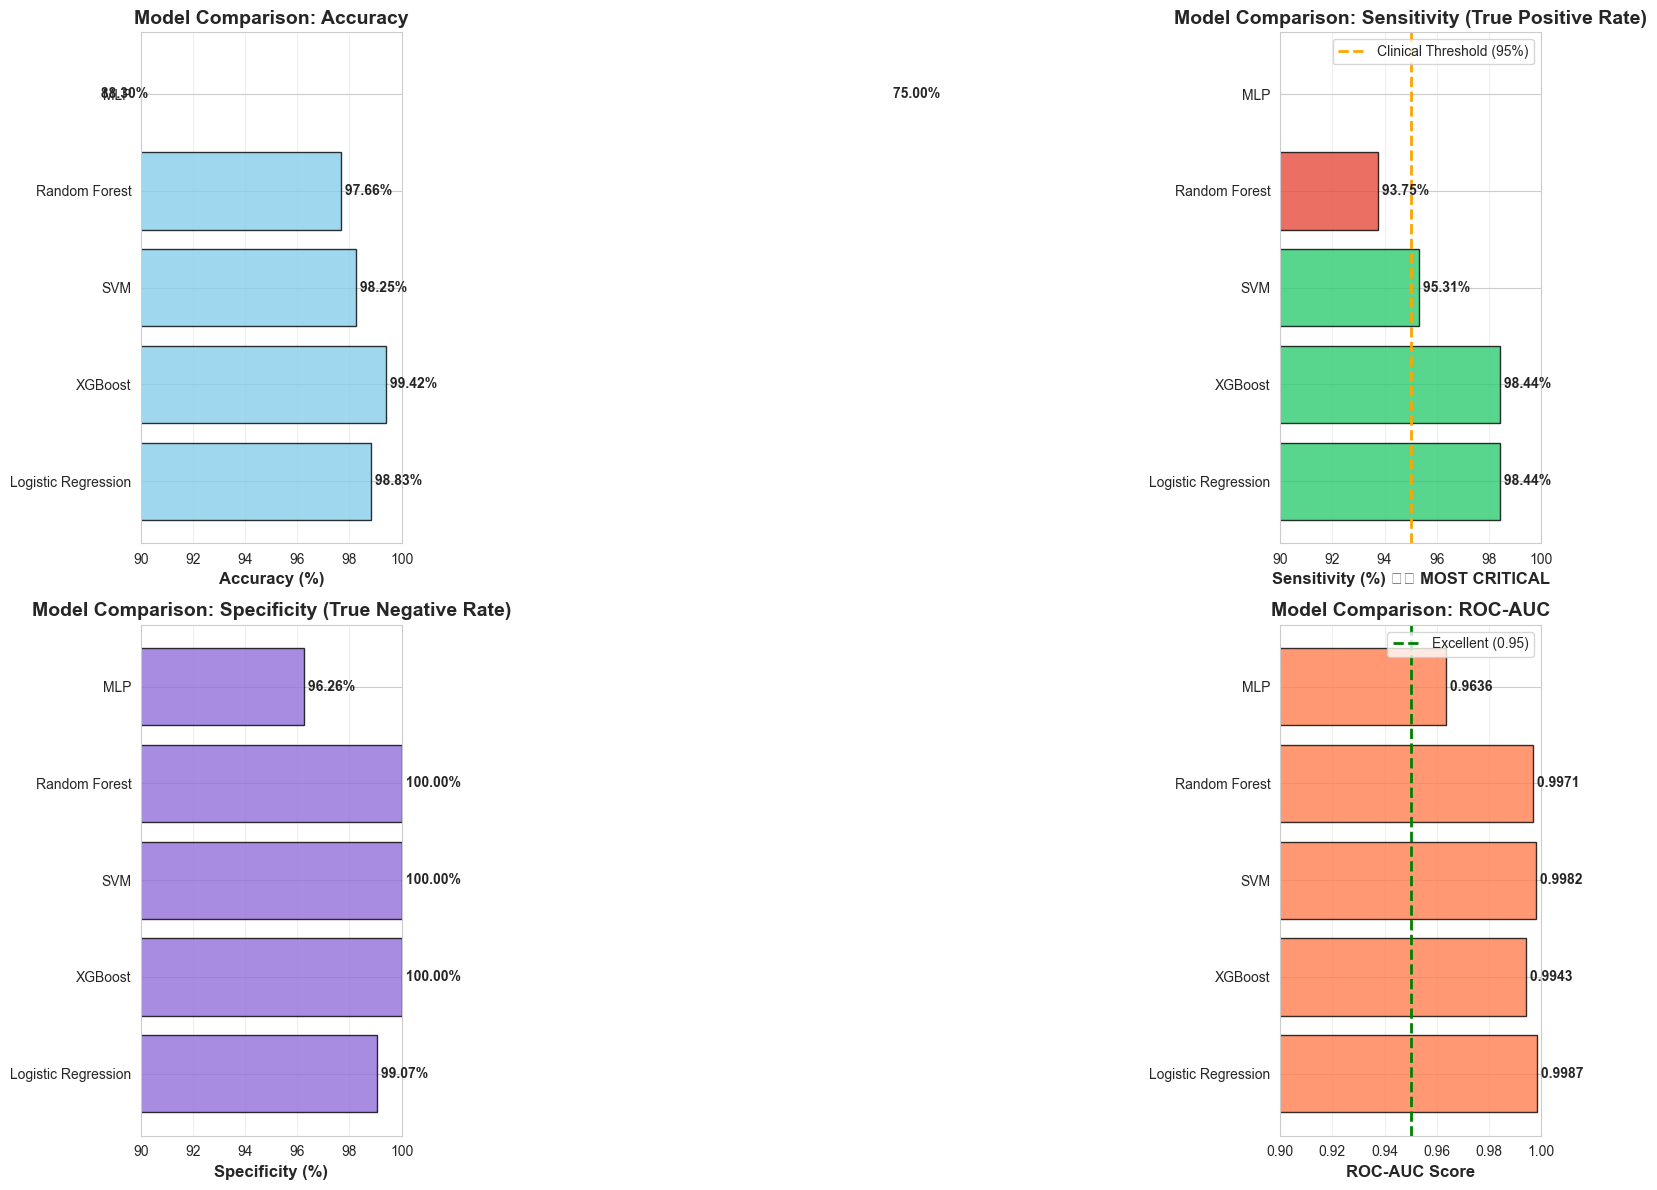

✅ Model comparison charts created!

⚠️  REMEMBER: Sensitivity is the MOST CRITICAL metric for cancer detection!


In [34]:
# Create comparison bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data
models = comparison_df['Model'].tolist()
accuracy = comparison_df['Accuracy (%)'].tolist()
sensitivity = comparison_df['Sensitivity (%)'].tolist()
specificity = comparison_df['Specificity (%)'].tolist()
roc_auc = comparison_df['ROC-AUC'].tolist()

# Accuracy comparison
ax1 = axes[0, 0]
bars1 = ax1.barh(models, accuracy, color='skyblue', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: Accuracy', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.set_xlim([90, 100])
for i, (bar, val) in enumerate(zip(bars1, accuracy)):
    ax1.text(val, i, f' {val:.2f}%', va='center', fontweight='bold')

# Sensitivity comparison (MOST IMPORTANT!)
ax2 = axes[0, 1]
colors_sens = ['#2ecc71' if s >= 95 else '#e74c3c' for s in sensitivity]  # Green if good, red if poor
bars2 = ax2.barh(models, sensitivity, color=colors_sens, alpha=0.8, edgecolor='black')
ax2.set_xlabel('Sensitivity (%) ⚠️ MOST CRITICAL', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: Sensitivity (True Positive Rate)', fontsize=14, fontweight='bold')
ax2.axvline(x=95, color='orange', linestyle='--', linewidth=2, label='Clinical Threshold (95%)')
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim([90, 100])
ax2.legend()
for i, (bar, val) in enumerate(zip(bars2, sensitivity)):
    ax2.text(val, i, f' {val:.2f}%', va='center', fontweight='bold')

# Specificity comparison
ax3 = axes[1, 0]
bars3 = ax3.barh(models, specificity, color='mediumpurple', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Specificity (%)', fontsize=12, fontweight='bold')
ax3.set_title('Model Comparison: Specificity (True Negative Rate)', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.set_xlim([90, 100])
for i, (bar, val) in enumerate(zip(bars3, specificity)):
    ax3.text(val, i, f' {val:.2f}%', va='center', fontweight='bold')

# ROC-AUC comparison
ax4 = axes[1, 1]
bars4 = ax4.barh(models, roc_auc, color='coral', alpha=0.8, edgecolor='black')
ax4.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax4.set_title('Model Comparison: ROC-AUC', fontsize=14, fontweight='bold')
ax4.axvline(x=0.95, color='green', linestyle='--', linewidth=2, label='Excellent (0.95)')
ax4.grid(axis='x', alpha=0.3)
ax4.set_xlim([0.90, 1.0])
ax4.legend()
for i, (bar, val) in enumerate(zip(bars4, roc_auc)):
    ax4.text(val, i, f' {val:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Model comparison charts created!")
print("\n⚠️  REMEMBER: Sensitivity is the MOST CRITICAL metric for cancer detection!")


#### 5.6.2 Confusion Matrices


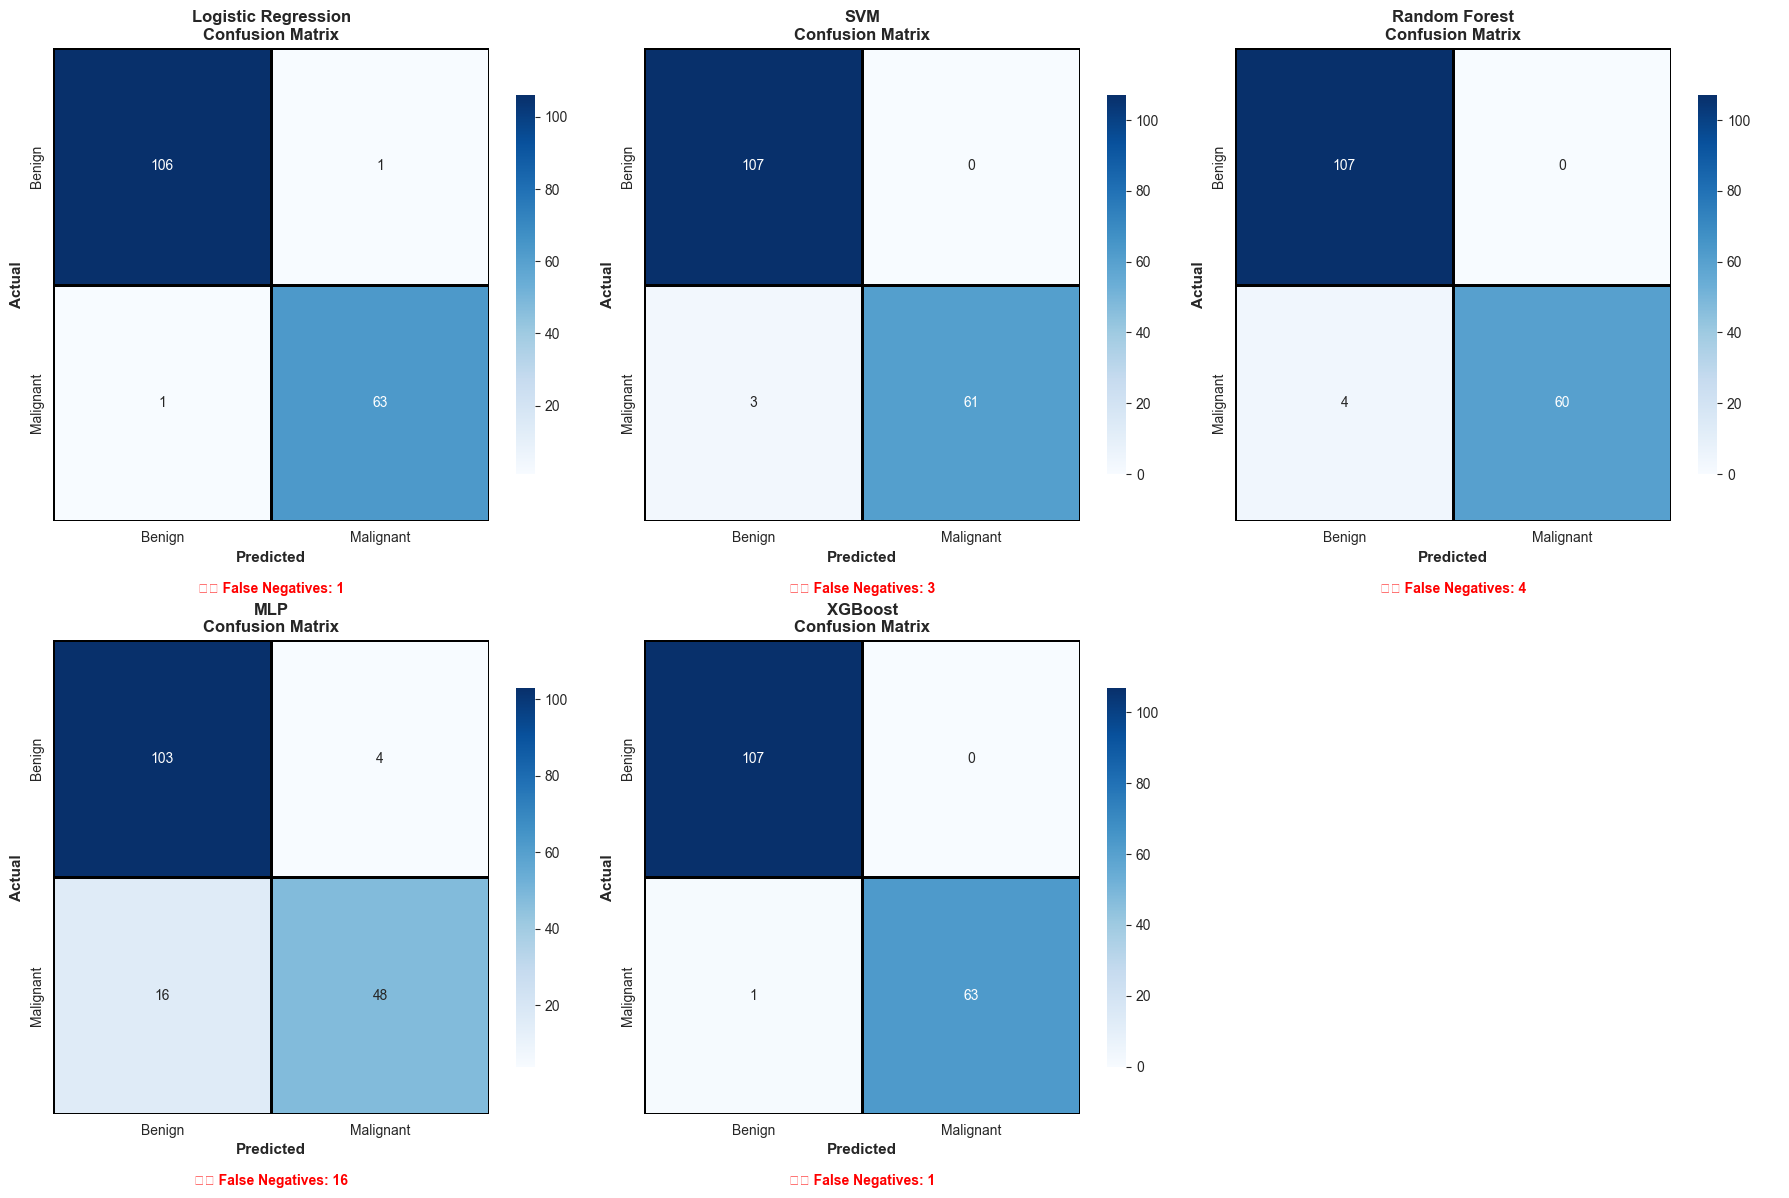

✅ Confusion matrices created!

⚠️  False Negatives (FN) = Missed cancers - MUST be minimized!


In [35]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

model_names = list(models_dict.keys())
for idx, model_name in enumerate(model_names):
    ax = axes[idx]
    cm = models_dict[model_name]['results']['confusion_matrix']
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'shrink': 0.8}, linewidths=2, linecolor='black')
    
    ax.set_xlabel('Predicted', fontsize=11, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    ax.set_xticklabels(['Benign', 'Malignant'])
    ax.set_yticklabels(['Benign', 'Malignant'])
    
    # Highlight False Negatives (most dangerous)
    if cm[1, 0] > 0:  # If there are False Negatives
        # Add text annotation for warning
        ax.text(0.5, -0.15, f'⚠️ False Negatives: {cm[1, 0]}', 
               transform=ax.transAxes, ha='center', fontsize=10, 
               color='red', fontweight='bold')
    else:
        ax.text(0.5, -0.15, '✅ No False Negatives!', 
               transform=ax.transAxes, ha='center', fontsize=10, 
               color='green', fontweight='bold')

# Remove extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

print("✅ Confusion matrices created!")
print("\n⚠️  False Negatives (FN) = Missed cancers - MUST be minimized!")


#### 5.6.3 ROC Curves


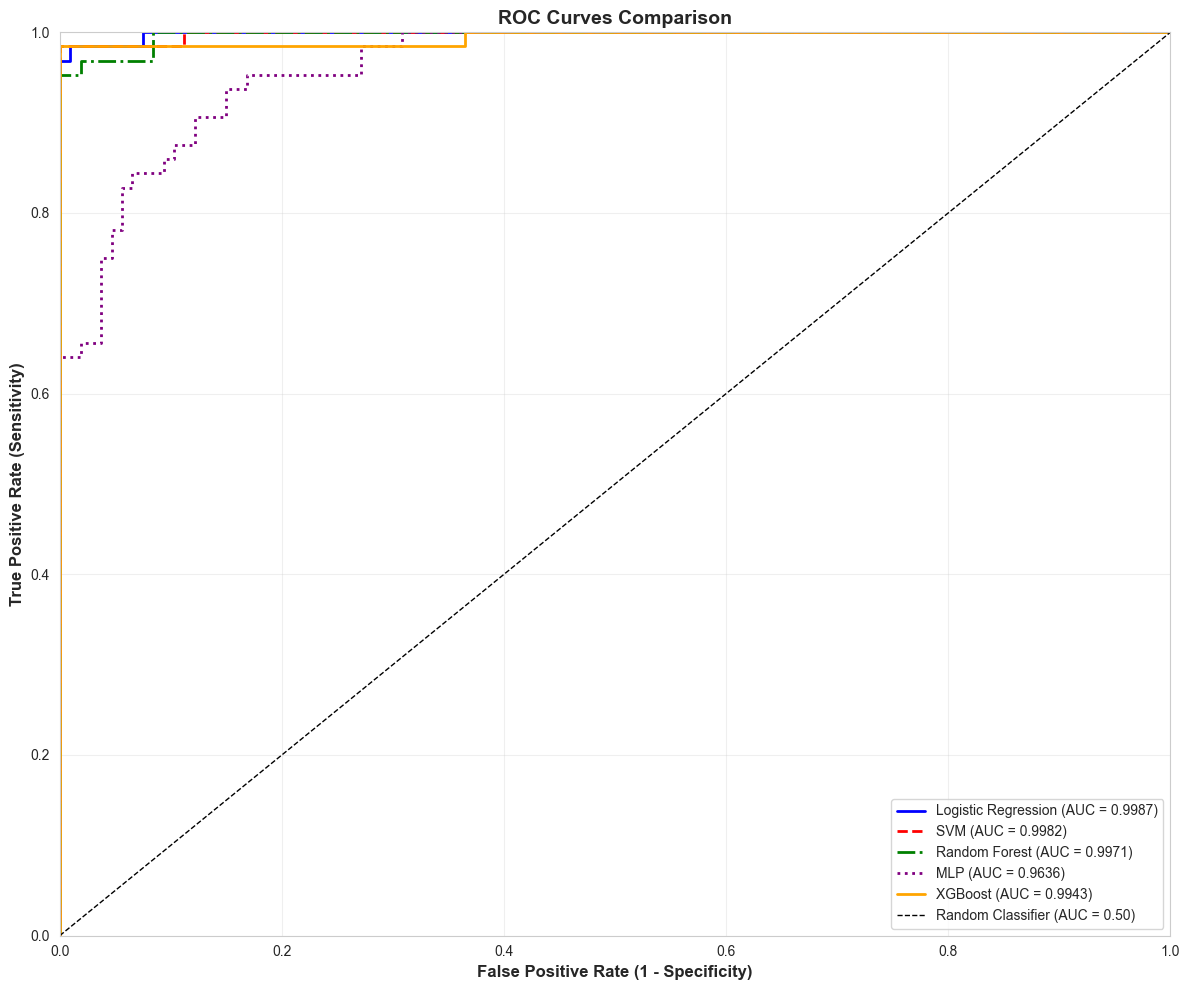

✅ ROC curves created!
📌 Higher AUC = Better ability to distinguish between classes
⚠️  Focus on high True Positive Rate (Sensitivity) while keeping False Positive Rate low


In [36]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 10))

# Dictionary to store predictions for each model
predictions_dict = {
    'Logistic Regression': (y_test_proba_lr, models_dict['Logistic Regression']['results']['roc_auc']),
    'SVM': (y_test_proba_svm, models_dict['SVM']['results']['roc_auc']),
    'Random Forest': (y_test_proba_rf, models_dict['Random Forest']['results']['roc_auc']),
    'MLP': (y_test_proba_mlp, models_dict['MLP']['results']['roc_auc']),
    'XGBoost': (y_test_proba_xgb, models_dict['XGBoost']['results']['roc_auc'])
}

colors = ['blue', 'red', 'green', 'purple', 'orange']
linestyles = ['-', '--', '-.', ':', '-']

for idx, (model_name, (y_proba, roc_auc)) in enumerate(predictions_dict.items()):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, color=colors[idx], linestyle=linestyles[idx], 
             linewidth=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print("✅ ROC curves created!")
print("📌 Higher AUC = Better ability to distinguish between classes")
print("⚠️  Focus on high True Positive Rate (Sensitivity) while keeping False Positive Rate low")


### 5.7 Feature Importance Analysis

Understanding which features are most important for predictions (critical for clinical interpretability).


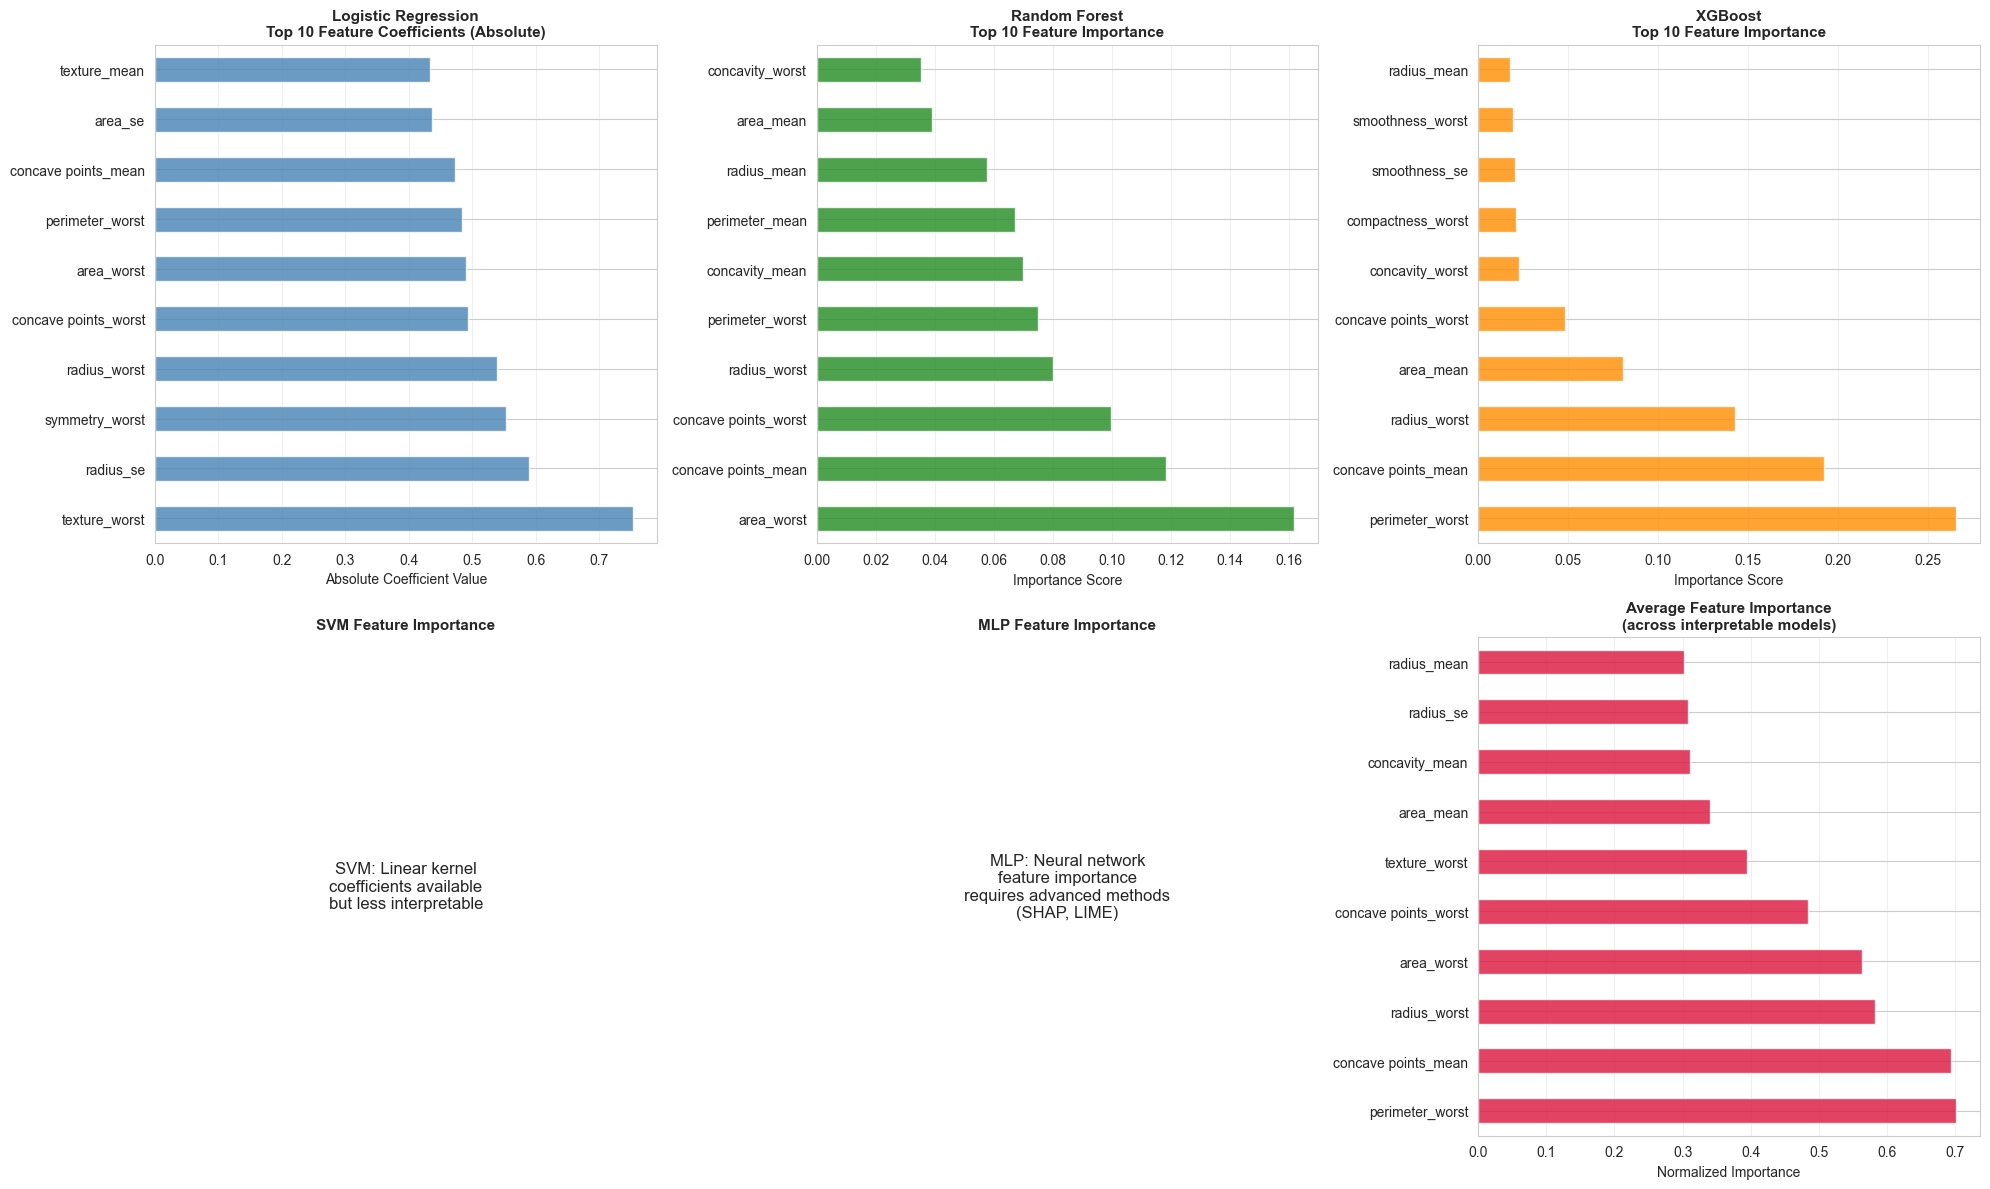

✅ Feature importance analysis complete!

📌 Key Insights:
   • Most important features across models:
      1. perimeter_worst: 0.7014
      2. concave points_mean: 0.6942
      3. radius_worst: 0.5828
      4. area_worst: 0.5633
      5. concave points_worst: 0.4845


In [37]:
# Get feature importance from tree-based models and coefficients from linear models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# 1. Logistic Regression - Coefficients
ax = axes[0]
lr_coef = np.abs(lr_model.coef_[0])
feature_importance_lr = pd.Series(lr_coef, index=X_train_scaled.columns).sort_values(ascending=False).head(10)
feature_importance_lr.plot(kind='barh', ax=ax, color='steelblue', alpha=0.8)
ax.set_title('Logistic Regression\nTop 10 Feature Coefficients (Absolute)', fontsize=11, fontweight='bold')
ax.set_xlabel('Absolute Coefficient Value', fontsize=10)
ax.grid(axis='x', alpha=0.3)

# 2. Random Forest - Feature Importance
ax = axes[1]
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False).head(10)
rf_importance.plot(kind='barh', ax=ax, color='forestgreen', alpha=0.8)
ax.set_title('Random Forest\nTop 10 Feature Importance', fontsize=11, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=10)
ax.grid(axis='x', alpha=0.3)

# 3. XGBoost - Feature Importance
ax = axes[2]
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False).head(10)
xgb_importance.plot(kind='barh', ax=ax, color='darkorange', alpha=0.8)
ax.set_title('XGBoost\nTop 10 Feature Importance', fontsize=11, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=10)
ax.grid(axis='x', alpha=0.3)

# 4-5. SVM and MLP don't have straightforward feature importance
axes[3].text(0.5, 0.5, 'SVM: Linear kernel\ncoefficients available\nbut less interpretable', 
            ha='center', va='center', fontsize=12, transform=axes[3].transAxes)
axes[3].set_title('SVM Feature Importance', fontsize=11, fontweight='bold')
axes[3].axis('off')

axes[4].text(0.5, 0.5, 'MLP: Neural network\nfeature importance\nrequires advanced methods\n(SHAP, LIME)', 
            ha='center', va='center', fontsize=12, transform=axes[4].transAxes)
axes[4].set_title('MLP Feature Importance', fontsize=11, fontweight='bold')
axes[4].axis('off')

# 6. Combined Top Features (average across models)
ax = axes[5]
all_importances = pd.DataFrame({
    'Logistic Regression': np.abs(lr_model.coef_[0]),
    'Random Forest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
}, index=X_train_scaled.columns)

# Normalize and average
all_importances_norm = all_importances / all_importances.max()
avg_importance = all_importances_norm.mean(axis=1).sort_values(ascending=False).head(10)
avg_importance.plot(kind='barh', ax=ax, color='crimson', alpha=0.8)
ax.set_title('Average Feature Importance\n(across interpretable models)', fontsize=11, fontweight='bold')
ax.set_xlabel('Normalized Importance', fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Feature importance analysis complete!")
print("\n📌 Key Insights:")
print(f"   • Most important features across models:")
for i, (feature, importance) in enumerate(avg_importance.head(5).items(), 1):
    print(f"      {i}. {feature}: {importance:.4f}")


### 5.8 Final Model Selection and Summary

Select the best model based on clinical criteria (Sensitivity is paramount).


In [38]:
print("=" * 100)
print("FINAL MODEL SELECTION - CLINICAL CRITERIA")
print("=" * 100)

# Filter models that meet ALL clinical thresholds (prevents pathological models)
# Minimum thresholds: Sensitivity ≥ 95%, Specificity ≥ 80%, Accuracy ≥ 85%
acceptable_models = comparison_df[
    (comparison_df['Sensitivity (%)'] >= 95.0) &  # Must catch cancers
    (comparison_df['Specificity (%)'] >= 80.0) &  # Must not flag everything as cancer
    (comparison_df['Accuracy (%)'] >= 85.0)      # Must be reasonably accurate
].copy()

# Identify rejected models (don't meet minimum thresholds)
rejected_models = comparison_df[
    ~((comparison_df['Sensitivity (%)'] >= 95.0) & 
      (comparison_df['Specificity (%)'] >= 80.0) & 
      (comparison_df['Accuracy (%)'] >= 85.0))
]

if len(rejected_models) > 0:
    print("\n⚠️  REJECTED MODELS (Don't meet minimum clinical thresholds):")
    print("   Minimum thresholds: Sensitivity ≥ 95%, Specificity ≥ 80%, Accuracy ≥ 85%")
    for idx, row in rejected_models.iterrows():
        issues = []
        if row['Sensitivity (%)'] < 95.0:
            issues.append(f"Sensitivity={row['Sensitivity (%)']:.1f}% (<95%)")
        if row['Specificity (%)'] < 80.0:
            issues.append(f"Specificity={row['Specificity (%)']:.1f}% (<80%)")
        if row['Accuracy (%)'] < 85.0:
            issues.append(f"Accuracy={row['Accuracy (%)']:.1f}% (<85%)")
        print(f"   ❌ {row['Model']}: {', '.join(issues)}")
        if row['Specificity (%)'] < 50 or row['Accuracy (%)'] < 70:
            print(f"      ⚠️  PATHOLOGICAL BEHAVIOR: Model may be predicting everything as one class!")

if len(acceptable_models) > 0:
    print(f"\n✅ {len(acceptable_models)} model(s) meet ALL clinical thresholds:")
    for idx, row in acceptable_models.iterrows():
        print(f"\n   {row['Model']}:")
        print(f"      • Sensitivity: {row['Sensitivity (%)']:.2f}% ✅")
        print(f"      • Specificity: {row['Specificity (%)']:.2f}% ✅")
        print(f"      • Accuracy: {row['Accuracy (%)']:.2f}% ✅")
        print(f"      • ROC-AUC: {row['ROC-AUC']:.4f}")
        print(f"      • False Negatives: {int(row['FN'])}")
else:
    print("\n⚠️  WARNING: No models meet ALL clinical thresholds!")
    print("   All models need improvement before clinical deployment.")
    print("   Consider: adjusting hyperparameters, feature engineering, or ensemble methods.")

# Select best model (prioritize Sensitivity, then ROC-AUC, then Accuracy)
if len(acceptable_models) > 0:
    # Sort by: Sensitivity (desc), then ROC-AUC (desc), then Accuracy (desc)
    best_model_row = acceptable_models.sort_values(
        ['Sensitivity (%)', 'ROC-AUC', 'Accuracy (%)'], 
        ascending=[False, False, False]
    ).iloc[0]
    
    best_model_name = best_model_row['Model']
    best_model = models_dict[best_model_name]['model']
    
    print("\n" + "=" * 100)
    print(f"🏆 BEST MODEL SELECTED: {best_model_name}")
    print("=" * 100)
    print(f"\n📊 Performance Metrics:")
    print(f"   • Accuracy:      {best_model_row['Accuracy (%)']:.2f}%")
    print(f"   • Sensitivity:   {best_model_row['Sensitivity (%)']:.2f}% ⚠️ (MOST CRITICAL)")
    print(f"   • Specificity:   {best_model_row['Specificity (%)']:.2f}%")
    print(f"   • ROC-AUC:       {best_model_row['ROC-AUC']:.4f}")
    print(f"   • False Negatives: {int(best_model_row['FN'])}")
    
    if best_model_row['FN'] == 0:
        print(f"\n   ✅ PERFECT: No cancers missed!")
    elif best_model_row['FN'] <= 2:
        print(f"\n   ✅ EXCELLENT: Very few cancers missed")
    else:
        print(f"\n   ⚠️  CAUTION: Some cancers missed - monitor closely")
    
    print(f"\n⏱️  Computational Performance:")
    print(f"   • Training Time: {best_model_row['Training Time (s)']:.3f} seconds")
    
    print(f"\n📌 Recommendation:")
    if best_model_row['Sensitivity (%)'] >= 98:
        print(f"   ✅ This model is EXCELLENT for clinical deployment")
        print(f"   ✅ Sensitivity is outstanding - catches almost all cancers")
    elif best_model_row['Sensitivity (%)'] >= 95:
        print(f"   ✅ This model meets clinical standards")
        print(f"   ✅ Sensitivity is acceptable - suitable for clinical use")
    else:
        print(f"   ❌ This model needs improvement before clinical deployment")
        print(f"   ❌ Sensitivity is below acceptable threshold")
    
    # Store best model for reference
    print(f"\n✅ Best model stored in variable: best_model_name = '{best_model_name}'")
    
else:
    print("\n❌ No acceptable model found. Consider:")
    print("   • Hyperparameter tuning")
    print("   • Feature engineering")
    print("   • Class imbalance handling improvements")
    print("   • Ensemble methods")

print("\n" + "=" * 100)


FINAL MODEL SELECTION - CLINICAL CRITERIA

⚠️  REJECTED MODELS (Don't meet minimum clinical thresholds):
   Minimum thresholds: Sensitivity ≥ 95%, Specificity ≥ 80%, Accuracy ≥ 85%
   ❌ Random Forest: Sensitivity=93.8% (<95%)
   ❌ MLP: Sensitivity=75.0% (<95%)

✅ 3 model(s) meet ALL clinical thresholds:

   Logistic Regression:
      • Sensitivity: 98.44% ✅
      • Specificity: 99.07% ✅
      • Accuracy: 98.83% ✅
      • ROC-AUC: 0.9987
      • False Negatives: 1

   XGBoost:
      • Sensitivity: 98.44% ✅
      • Specificity: 100.00% ✅
      • Accuracy: 99.42% ✅
      • ROC-AUC: 0.9943
      • False Negatives: 1

   SVM:
      • Sensitivity: 95.31% ✅
      • Specificity: 100.00% ✅
      • Accuracy: 98.25% ✅
      • ROC-AUC: 0.9982
      • False Negatives: 3

🏆 BEST MODEL SELECTED: Logistic Regression

📊 Performance Metrics:
   • Accuracy:      98.83%
   • Sensitivity:   98.44% ⚠️ (MOST CRITICAL)
   • Specificity:   99.07%
   • ROC-AUC:       0.9987
   • False Negatives: 1

   ✅ EXCELLE

### 5.9 Save Best Model

Save the best model, scaler, and label encoder for future use and deployment.


In [39]:
import joblib
import os
from datetime import datetime

print("=" * 100)
print("SAVING BEST MODEL AND PREPROCESSING COMPONENTS")
print("=" * 100)

# Check if best model was selected
if 'best_model' in locals() and 'best_model_name' in locals():
    # Get performance metrics from comparison_df (more reliable than best_model_row)
    best_model_info = comparison_df[comparison_df['Model'] == best_model_name].iloc[0]
    model_results = models_dict[best_model_name]['results']
    
    # Create models directory if it doesn't exist
    models_dir = 'saved_models'
    os.makedirs(models_dir, exist_ok=True)
    
    # Generate timestamp for versioning
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save best model
    model_filename = f'{models_dir}/best_model_{best_model_name.replace(" ", "_").lower()}_{timestamp}.pkl'
    joblib.dump(best_model, model_filename)
    print(f"\n✅ Best Model Saved:")
    print(f"   • Model: {best_model_name}")
    print(f"   • File: {model_filename}")
    
    # Save scaler (required for preprocessing new data)
    scaler_filename = f'{models_dir}/scaler_{timestamp}.pkl'
    joblib.dump(scaler, scaler_filename)
    print(f"\n✅ Scaler Saved:")
    print(f"   • File: {scaler_filename}")
    print(f"   • Required for: Standardizing new input features")
    
    # Save label encoder (required for decoding predictions)
    encoder_filename = f'{models_dir}/label_encoder_{timestamp}.pkl'
    joblib.dump(label_encoder, encoder_filename)
    print(f"\n✅ Label Encoder Saved:")
    print(f"   • File: {encoder_filename}")
    print(f"   • Required for: Converting predictions (0/1) back to (B/M)")
    
    # Save model metadata (performance metrics, best parameters, etc.)
    metadata = {
        'model_name': best_model_name,
        'model_type': type(best_model).__name__,
        'timestamp': timestamp,
        'performance_metrics': {
            'accuracy': float(best_model_info['Accuracy (%)']),
            'sensitivity': float(best_model_info['Sensitivity (%)']),
            'specificity': float(best_model_info['Specificity (%)']),
            'roc_auc': float(best_model_info['ROC-AUC']),
            'false_negatives': int(best_model_info['FN']),
            'false_positives': int(best_model_info['FP']),
            'true_positives': int(best_model_info['TP']),
            'true_negatives': int(best_model_info['TN'])
        },
        'best_parameters': models_dict[best_model_name].get('best_params', {}),
        'training_time': float(best_model_info['Training Time (s)']),
        'random_state': RANDOM_STATE,
        'feature_names': list(X_train_scaled.columns),
        'class_labels': {0: 'Benign (B)', 1: 'Malignant (M)'}
    }
    
    metadata_filename = f'{models_dir}/model_metadata_{timestamp}.pkl'
    joblib.dump(metadata, metadata_filename)
    print(f"\n✅ Model Metadata Saved:")
    print(f"   • File: {metadata_filename}")
    print(f"   • Contains: Performance metrics, hyperparameters, feature names, etc.")
    
    # Save latest version (without timestamp) for easy loading
    latest_model_file = f'{models_dir}/best_model_latest.pkl'
    latest_scaler_file = f'{models_dir}/scaler_latest.pkl'
    latest_encoder_file = f'{models_dir}/label_encoder_latest.pkl'
    latest_metadata_file = f'{models_dir}/model_metadata_latest.pkl'
    
    joblib.dump(best_model, latest_model_file)
    joblib.dump(scaler, latest_scaler_file)
    joblib.dump(label_encoder, latest_encoder_file)
    joblib.dump(metadata, latest_metadata_file)
    
    print(f"\n✅ Latest Version Files Created (for easy loading):")
    print(f"   • {latest_model_file}")
    print(f"   • {latest_scaler_file}")
    print(f"   • {latest_encoder_file}")
    print(f"   • {latest_metadata_file}")
    
    print(f"\n" + "=" * 100)
    print("📋 HOW TO LOAD AND USE THE SAVED MODEL:")
    print("=" * 100)
    print("""
# Example code to load and use the saved model:

import joblib
import numpy as np
import pandas as pd

# Load the saved components
model = joblib.load('saved_models/best_model_latest.pkl')
scaler = joblib.load('saved_models/scaler_latest.pkl')
encoder = joblib.load('saved_models/label_encoder_latest.pkl')
metadata = joblib.load('saved_models/model_metadata_latest.pkl')

# Prepare new data (must have same 30 features in same order)
# new_data should be a DataFrame or numpy array with shape (n_samples, 30)
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions_proba = model.predict_proba(new_data_scaled)[:, 1]  # Probability of Malignant
predictions = model.predict(new_data_scaled)  # Binary predictions (0 or 1)

# Decode predictions back to labels
predictions_labels = encoder.inverse_transform(predictions)  # 'B' or 'M'

# Display results
for i, (prob, label) in enumerate(zip(predictions_proba, predictions_labels)):
    print(f"Sample {i+1}: {label} (Probability: {prob:.4f})")
    if prob >= 0.5:
        print(f"  ⚠️  MALIGNANT - Requires immediate medical attention!")
    else:
        print(f"  ✅ BENIGN - Regular monitoring recommended")
""")
    
    print("\n" + "=" * 100)
    print("✅ MODEL SAVING COMPLETE!")
    print("=" * 100)
    
else:
    print("\n⚠️  WARNING: Best model not found!")
    print("   Make sure to run the model selection cell (Cell 71) first.")
    print("   The best model must be selected before it can be saved.")


SAVING BEST MODEL AND PREPROCESSING COMPONENTS

✅ Best Model Saved:
   • Model: Logistic Regression
   • File: saved_models/best_model_logistic_regression_20251207_101314.pkl

✅ Scaler Saved:
   • File: saved_models/scaler_20251207_101314.pkl
   • Required for: Standardizing new input features

✅ Label Encoder Saved:
   • File: saved_models/label_encoder_20251207_101314.pkl
   • Required for: Converting predictions (0/1) back to (B/M)

✅ Model Metadata Saved:
   • File: saved_models/model_metadata_20251207_101314.pkl
   • Contains: Performance metrics, hyperparameters, feature names, etc.

✅ Latest Version Files Created (for easy loading):
   • saved_models/best_model_latest.pkl
   • saved_models/scaler_latest.pkl
   • saved_models/label_encoder_latest.pkl
   • saved_models/model_metadata_latest.pkl

📋 HOW TO LOAD AND USE THE SAVED MODEL:

# Example code to load and use the saved model:

import joblib
import numpy as np
import pandas as pd

# Load the saved components
model = joblib.lo

In [40]:
# Create final summary table (similar to paper format)
final_summary = comparison_df[['Model', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'ROC-AUC']].copy()
final_summary.columns = ['Algorithm', 'Test Accuracy (%)', 'Sensitivity (TPR)', 'Specificity (TNR)', 'ROC-AUC']

print("=" * 100)
print("COMPLETE RESULTS SUMMARY")
print("=" * 100)
print("\nModels sorted by Sensitivity (most important for cancer detection):\n")
print(final_summary.to_string(index=False))

print("\n" + "=" * 100)
print("📊 INTERPRETATION GUIDE:")
print("=" * 100)
print("""
• Accuracy: Overall correctness of predictions
• Sensitivity (TPR): Proportion of actual cancers correctly identified ⚠️ MOST CRITICAL
• Specificity (TNR): Proportion of actual benign cases correctly identified
• ROC-AUC: Overall discriminative ability (threshold-independent)

⚠️  CLINICAL PRIORITY:
   1. Sensitivity ≥ 95% is REQUIRED (false negatives are life-threatening)
   2. ROC-AUC ≥ 0.95 indicates excellent model quality
   3. Specificity should be high to minimize false alarms
   4. Accuracy is useful but not sufficient alone
""")

print("=" * 100)
print("✅ MODEL TRAINING AND EVALUATION COMPLETE!")
print("=" * 100)


COMPLETE RESULTS SUMMARY

Models sorted by Sensitivity (most important for cancer detection):

          Algorithm  Test Accuracy (%)  Sensitivity (TPR)  Specificity (TNR)  ROC-AUC
Logistic Regression          98.830409            98.4375          99.065421 0.998686
            XGBoost          99.415205            98.4375         100.000000 0.994305
                SVM          98.245614            95.3125         100.000000 0.998248
      Random Forest          97.660819            93.7500         100.000000 0.997079
                MLP          88.304094            75.0000          96.261682 0.963639

📊 INTERPRETATION GUIDE:

• Accuracy: Overall correctness of predictions
• Sensitivity (TPR): Proportion of actual cancers correctly identified ⚠️ MOST CRITICAL
• Specificity (TNR): Proportion of actual benign cases correctly identified
• ROC-AUC: Overall discriminative ability (threshold-independent)

⚠️  CLINICAL PRIORITY:
   1. Sensitivity ≥ 95% is REQUIRED (false negatives are life-

---

## Phase 6: Model Validation and Optimization



### 6.1 Cross-Validation Execution

**Execute cross-validation for all models** to get robust performance estimates (as recommended in paper).


In [41]:
print("=" * 100)
print("CROSS-VALIDATION EXECUTION")
print("=" * 100)
print("\n⚠️  Executing Stratified K-Fold Cross-Validation for robust performance estimates")
print(f"   • K-Folds: {K_FOLDS}")
print(f"   • Metrics: Accuracy, Sensitivity, Specificity, Precision, F1, ROC-AUC\n")

# Store CV results for all models
cv_results_dict = {}

# Define custom scorer for specificity (recall for negative class)
specificity_scorer = make_scorer(recall_score, pos_label=0)

# Execute cross-validation for each model
for model_name, model_info in models_dict.items():
    model = model_info['model']
    
    print(f"\n{'='*80}")
    print(f"Cross-Validating: {model_name}")
    print(f"{'='*80}")
    
    # Perform cross-validation
    cv_results = cross_validate(
        model, 
        X_train_scaled, 
        y_train,
        cv=cv,
        scoring={
            'accuracy': 'accuracy',
            'sensitivity': 'recall',  # Recall for positive class (Malignant)
            'specificity': specificity_scorer,  # Recall for negative class (Benign)
            'precision': 'precision',
            'f1': 'f1',
            'roc_auc': 'roc_auc'
        },
        return_train_score=False,
        n_jobs=-1
    )
    
    # Calculate mean and std for each metric
    cv_summary = {}
    for metric in ['accuracy', 'sensitivity', 'specificity', 'precision', 'f1', 'roc_auc']:
        scores = cv_results[f'test_{metric}']
        cv_summary[metric] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
    
    cv_results_dict[model_name] = cv_summary
    
    # Display results
    print(f"\n📊 Cross-Validation Results (Mean ± Std):")
    print(f"   • Accuracy:      {cv_summary['accuracy']['mean']*100:.2f}% ± {cv_summary['accuracy']['std']*100:.2f}%")
    print(f"   • Sensitivity:   {cv_summary['sensitivity']['mean']*100:.2f}% ± {cv_summary['sensitivity']['std']*100:.2f}% ⚠️ (MOST CRITICAL)")
    print(f"   • Specificity:   {cv_summary['specificity']['mean']*100:.2f}% ± {cv_summary['specificity']['std']*100:.2f}%")
    print(f"   • Precision:     {cv_summary['precision']['mean']*100:.2f}% ± {cv_summary['precision']['std']*100:.2f}%")
    print(f"   • F1-Score:      {cv_summary['f1']['mean']*100:.2f}% ± {cv_summary['f1']['std']*100:.2f}%")
    print(f"   • ROC-AUC:       {cv_summary['roc_auc']['mean']:.4f} ± {cv_summary['roc_auc']['std']:.4f}")

print("\n" + "=" * 100)
print("✅ CROSS-VALIDATION COMPLETE FOR ALL MODELS")
print("=" * 100)


CROSS-VALIDATION EXECUTION

⚠️  Executing Stratified K-Fold Cross-Validation for robust performance estimates
   • K-Folds: 5
   • Metrics: Accuracy, Sensitivity, Specificity, Precision, F1, ROC-AUC


Cross-Validating: Logistic Regression

📊 Cross-Validation Results (Mean ± Std):
   • Accuracy:      96.99% ± 1.88%
   • Sensitivity:   97.29% ± 2.57% ⚠️ (MOST CRITICAL)
   • Specificity:   96.80% ± 2.71%
   • Precision:     94.93% ± 4.00%
   • F1-Score:      96.04% ± 2.46%
   • ROC-AUC:       0.9928 ± 0.0057

Cross-Validating: SVM

📊 Cross-Validation Results (Mean ± Std):
   • Accuracy:      97.74% ± 0.51%
   • Sensitivity:   96.62% ± 0.06% ⚠️ (MOST CRITICAL)
   • Specificity:   98.40% ± 0.80%
   • Precision:     97.29% ± 1.36%
   • F1-Score:      96.95% ± 0.68%
   • ROC-AUC:       0.9958 ± 0.0036

Cross-Validating: Random Forest

📊 Cross-Validation Results (Mean ± Std):
   • Accuracy:      94.72% ± 3.21%
   • Sensitivity:   93.86% ± 4.03% ⚠️ (MOST CRITICAL)
   • Specificity:   95.20% ± 6

### 6.2 Cross-Validation vs Test Set Comparison

Compare cross-validation results with test set performance to assess model stability.


In [42]:
# Create comparison DataFrame
cv_comparison_data = []

for model_name in models_dict.keys():
    # Test set results
    test_results = models_dict[model_name]['results']
    # CV results
    cv_results = cv_results_dict[model_name]
    
    cv_comparison_data.append({
        'Model': model_name,
        'Test Accuracy': test_results['accuracy'] * 100,
        'CV Accuracy': cv_results['accuracy']['mean'] * 100,
        'CV Accuracy Std': cv_results['accuracy']['std'] * 100,
        'Test Sensitivity': test_results['sensitivity'] * 100,
        'CV Sensitivity': cv_results['sensitivity']['mean'] * 100,
        'CV Sensitivity Std': cv_results['sensitivity']['std'] * 100,
        'Test ROC-AUC': test_results['roc_auc'] if test_results['roc_auc'] else 0,
        'CV ROC-AUC': cv_results['roc_auc']['mean'],
        'CV ROC-AUC Std': cv_results['roc_auc']['std']
    })

cv_comparison_df = pd.DataFrame(cv_comparison_data)

print("=" * 100)
print("CROSS-VALIDATION vs TEST SET COMPARISON")
print("=" * 100)
print("\n📊 Model Stability Assessment:\n")

for _, row in cv_comparison_df.iterrows():
    model_name = row['Model']
    
    # Calculate differences
    acc_diff = abs(row['Test Accuracy'] - row['CV Accuracy'])
    sens_diff = abs(row['Test Sensitivity'] - row['CV Sensitivity'])
    auc_diff = abs(row['Test ROC-AUC'] - row['CV ROC-AUC'])
    
    # Stability assessment
    stability = "✅ STABLE" if (acc_diff < 3 and sens_diff < 3) else "⚠️ VARIABLE"
    
    print(f"\n{model_name}:")
    print(f"   Accuracy:  Test={row['Test Accuracy']:.2f}% | CV={row['CV Accuracy']:.2f}%±{row['CV Accuracy Std']:.2f}% | Diff={acc_diff:.2f}%")
    print(f"   Sensitivity: Test={row['Test Sensitivity']:.2f}% | CV={row['CV Sensitivity']:.2f}%±{row['CV Sensitivity Std']:.2f}% | Diff={sens_diff:.2f}% {stability}")
    print(f"   ROC-AUC:   Test={row['Test ROC-AUC']:.4f} | CV={row['CV ROC-AUC']:.4f}±{row['CV ROC-AUC Std']:.4f} | Diff={auc_diff:.4f}")

print("\n" + "=" * 100)
print("📌 Key Insights:")
print("   • Small differences (<3%) indicate stable models")
print("   • Large differences suggest overfitting or high variance")
print("   • CV results are more reliable for generalization assessment")
print("=" * 100)


CROSS-VALIDATION vs TEST SET COMPARISON

📊 Model Stability Assessment:


Logistic Regression:
   Accuracy:  Test=98.83% | CV=96.99%±1.88% | Diff=1.84%
   Sensitivity: Test=98.44% | CV=97.29%±2.57% | Diff=1.15% ✅ STABLE
   ROC-AUC:   Test=0.9987 | CV=0.9928±0.0057 | Diff=0.0058

SVM:
   Accuracy:  Test=98.25% | CV=97.74%±0.51% | Diff=0.51%
   Sensitivity: Test=95.31% | CV=96.62%±0.06% | Diff=1.31% ✅ STABLE
   ROC-AUC:   Test=0.9982 | CV=0.9958±0.0036 | Diff=0.0024

Random Forest:
   Accuracy:  Test=97.66% | CV=94.72%±3.21% | Diff=2.94%
   Sensitivity: Test=93.75% | CV=93.86%±4.03% | Diff=0.11% ✅ STABLE
   ROC-AUC:   Test=0.9971 | CV=0.9878±0.0030 | Diff=0.0093

MLP:
   Accuracy:  Test=88.30% | CV=96.22%±1.40% | Diff=7.92%
   Sensitivity: Test=75.00% | CV=92.55%±2.56% | Diff=17.55% ⚠️ VARIABLE
   ROC-AUC:   Test=0.9636 | CV=0.9927±0.0033 | Diff=0.0290

XGBoost:
   Accuracy:  Test=99.42% | CV=95.72%±2.05% | Diff=3.69%
   Sensitivity: Test=98.44% | CV=94.55%±2.81% | Diff=3.89% ⚠️ VARIABLE
